<a href="https://colab.research.google.com/github/Irecarreras/Trabajo-curso-Data-Science/blob/main/Trabajo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Introducción**

El cáncer de tiroides (CT) es uno de los tumores malignos más prevalentes del sistema endocrino, representando aproximadamente entre el 1% y el 3% de todos los nuevos tumores malignos a nivel mundial.......... ya lo haré

#**Objetivos**

En este proyecto se analizará el conjunto de datos "Multi Visit Thyroid Cancer monitoring" con el objetivo de explorar qué variables pueden ser determinantes en el cáncer de tiroides. Con ese fin, se plantean las siguientes variables respuesta:

+ **¿El riesgo de recidiva está relacionado con algún factor?**
+ **¿El tabaco o el historial familiar aumentan las probabilidades de sufrir cáncer de tiroides?**
+ **¿Algún factor está relacionado con el tamaño del tumor?**
+ **¿La disminución del tamaño del tumor entre la primera y la última visita se refleja en alguno de los biomarcadores hormonales tiroideos?** (TSH_Risk_Level, TPOAb_Probability,
 Thyroglobulin_Level_Predicted, Calcitonin_Level_Predicted, Reverse_T3_Index)
+ **Modelo predictivo de recidiva**


#**Material y métodos**

##Descripción del dataset

El dataset estudiado en este trabajo, obtenido del repositorio Kaggle (Multi Visit Thyroid Cancer Monitoring Dataset- SHD), contiene información de múltiples pacientes de cáncer de tiroide, estructurada por visitas de cada paciente. Esta información está recogida en las siguientes variables:

+ **Patient_ID**: Identificador único del paciente
+ **Visit_Number**: número de visita clínica
+ **Visit_Timestamp**: fecha de la visita clínica
+ **Scan_Type**: tipo de escáner realizado
+ **Age**: edad del paciente
+ **Gender**: sexo del paciente
+ **Weight_kg**: peso del paciente
+ **Height_cm**: altura del paciente
+ **BMI**: índice de masa corporal del paciente
+ **Family_History**: presencia de enfermedad tiroidea en la familia
+ **Smoking_Status**: indica si el paciente es fumador
+ **Radiation_Exposure**: indica si el paciente ha estado expuesto a radioterapia o fuentes de radiación previamente
+ **Nodule_Size_mm**: tamaño en mm del nódulo
+ **Shape_Score**: forma del nódulo
+ **Margin_Sharpness**: irregularidad del nódulo
+ **Echogenicity_Index**: índice de ecogenicidad tumoral
+ **Calcification_Presence**: presencia de calcificación, indicador maligno
+ **Vascularity_Score**: presencia de nuevos vasos sanguíneos dentro del tumor, biomarcador de imagen maligno
+ **Texture_Entropy**: hace referencia a la forma irregular del tumor, biomarcador de imagen maligno
+ **Asymmetry_Score**: hacer referencia a la asimetría del tumor, biomarcador de imagen maligno
+ **Capsular_Invasion_Indicator**: se refiere a la extensión del tumor más allá de sus márgenes originales, indicador maligno
+ **TSH_Risk_Level**: niveles de la hormona estimulante de la tiroides, biomarcador maligno en niveles altos
+ **TPOAb_Probability**: probabilidad de anticuerpos antitiroperoxidasa, en ocasiones podría ser biomarcador maligno en niveles altos
+ **Thyroglobulin_Level_Predicted**: niveles de tiroglobulina, proteína producida por la tiroides, biomarcador de metástasis y recidiva en niveles altos
+ **Calcitonin_Level_Predicted**: niveles de calcitonina, hormona producida por la tiroides, en ocasiones biomarcador de diagnóstico y monitorización
+ **Reverse_T3_Index**: niveles de la hormona T3 reversa, producida en la tiroides, posible biomarcador de malignidad
+ **Heart_Rate**: frecuencia cardíaca del paciente
+ **Daily_Steps**: número de pasos diarios del paciente
+ **Sleep_Patterns**: patrón de sueño del paciente
+ **Body_Temperature**: temperatura corporal del paciente
+ **Pulse_Oximetry**: indica la saturación de oxígeno en la sangre
+ **Stress_Level**: nivel de estrés del paciente
+ **Symptom_Onset_Duration**: duración de los síntomas desde su inicio
+ **Hormonal_Change_Rate**: tasa de cambio hormonal
+ **Medication_Adherence**: cumplimiento con el tratamiento
+ **Diagnosis_Label**: classification of the tumor
+ **Cancer_Type**: subtipo de cáncer
+ **Recurrence_Risk**: riesgo de recidiva

##Importación de datos y librerías

In [23]:
#Importación de las librerías
libraries<-c("tidyverse","dplyr","ggplot2", "patchwork", "skimr", "sqldf", "corrplot","rstatix")



installifnot <- function (pckgName){

 if(!require(pckgName, character.only=TRUE)){

   install.packages(pckgName, dep=TRUE)

 }

}

for(i in libraries){

 installifnot(i)

 library(i, character.only = TRUE, quietly = TRUE)

}

Loading required package: ggcorrplot

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘ggcorrplot’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘plyr’, ‘reshape2’



Attaching package: ‘ggcorrplot’


The following object is masked from ‘package:rstatix’:

    cor_pmat




In [5]:
#Importación del dataset

data<-read.csv("/content/sample_data/ThyroTrack-MV Processed Dataset.csv")

##Análisis exploratorio

In [6]:
#Resumen visual del dataset
head(data,10)

,Patient_ID,Visit_Number,Visit_Timestamp,Scan_Type,Age,Gender,Weight_kg,Height_cm,BMI,Family_History,⋯,Sleep_Patterns,Body_Temperature,Pulse_Oximetry,Stress_Level,Symptom_Onset_Duration,Hormonal_Change_Rate,Medication_Adherence,Diagnosis_Label,Cancer_Type,Recurrence_Risk
,<chr>,<int>,<chr>,<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<int>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<int>,<int>,<int>,<int>
1,P0001,1,2015-04-06,Ultrasound,82,Female,66.2,158.5,26.4,1,⋯,7.0,36.92,94.4,0.64,431,0.059,0,0,3,0
2,P0001,2,2020-03-23,FNA,82,Female,66.2,158.5,26.4,1,⋯,5.0,37.02,97.3,0.89,68,0.044,1,0,3,0
3,P0001,3,2020-10-11,Ultrasound,82,Female,66.2,158.5,26.4,1,⋯,3.3,36.74,93.8,0.09,429,0.054,0,0,3,0
4,P0001,4,2021-12-05,Ultrasound,82,Female,66.2,158.5,26.4,1,⋯,3.2,36.81,99.4,0.32,175,0.028,0,0,3,0
5,P0002,1,2016-09-10,Ultrasound,51,Female,26.5,169.4,9.2,1,⋯,3.9,36.44,93.0,0.79,619,0.011,0,0,4,0
6,P0002,2,2017-11-26,Ultrasound,51,Female,26.5,169.4,9.2,1,⋯,6.3,36.68,99.4,0.85,221,0.047,0,0,4,0
7,P0002,3,2019-12-17,Ultrasound,51,Female,26.5,169.4,9.2,1,⋯,8.5,36.81,98.4,0.01,428,0.060,1,0,4,0
8,P0002,4,2022-02-25,Ultrasound,51,Female,26.5,169.4,9.2,1,⋯,5.7,36.80,99.8,0.66,628,0.050,0,0,4,0
9,P0002,5,2024-08-09,FNA,51,Female,26.5,169.4,9.2,1,⋯,7.2,36.86,96.4,0.10,623,0.052,0,0,4,0


In [7]:
#Observar la estructura del dataset y estadística descriptiva resumida
skim(data)

── Data Summary ────────────────────────
                           Values
Name                       data  
Number of rows             280018
Number of columns          38    
_______________________          
Column type frequency:           
  character                6     
  numeric                  32    
________________________         
Group variables            None  

── Variable type: character ────────────────────────────────────────────────────
  skim_variable   n_missing complete_rate min max empty n_unique whitespace
1 Patient_ID              0             1   5   6     0    80000          0
2 Visit_Timestamp         0             1  10  10     0     3713          0
3 Scan_Type               0             1   3  12     0        3          0
4 Gender                  0             1   4   6     0        2          0
5 Smoking_Status          0             1   6  13     0        3          0
6 TSH_Risk_Level          0             1   3   6     0        3          0

── V

ERROR: Error in is.null(text_repr) || nchar(text_repr) == 0L: 'length = 17' in coercion to 'logical(1)'


Aplicando la función **skimr::skim()** se observa que el dataset contiene 38 variables totales, de las cuales 6 son de tipo carácter y 32 variables son de tipo numérico. No obstante, a muchas de estas variables no han sido clasificadas correctamente: por ejemplo, aunque las variables **Scan_type** o **Gender** se indiquen de tipo carácter, deberían estar descritas como tipo factor, con sus respectivos niveles. Lo mismo sucede para múltiples de las variables numéricas: hay variables como **Family_history** que son dicotómicas (niveles 0 y 1), pero realmente deberían estar descritas como tipo factor. Es por ello que el siguiente paso en la limpieza de datos es transformar una serie de variables seleccionadas a tipo factor.

Por otro lado, esta misma función mencionada, también aporta información acerca de los datos faltantes. Se observa que el dataset con el que trabajamos no presenta ningún dato faltante, por lo que no es necesario su procesamiento.

In [8]:
#Transformar las variables a tipo factor

data$Visit_Number<-as.factor(data$Visit_Number)
data$Gender<-as.factor(data$Gender)
data$Scan_Type<-as.factor(data$Scan_Type)
data$Smoking_Status<-as.factor(data$Smoking_Status)
data$TSH_Risk_Level<-as.factor(data$TSH_Risk_Level)
data$Family_History<-as.factor(data$Family_History)
data$Radiation_Exposure<-as.factor(data$Radiation_Exposure)
data$Calcification_Presence<-as.factor(data$Calcification_Presence)
data$Capsular_Invasion_Indicator<-as.factor(data$Capsular_Invasion_Indicator)
data$Medication_Adherence<-as.factor(data$Medication_Adherence)
data$Diagnosis_Label<-as.factor(data$Diagnosis_Label)
data$Cancer_Type<-as.factor(data$Cancer_Type)
data$Recurrence_Risk<-as.factor(data$Recurrence_Risk)

skim(data)

── Data Summary ────────────────────────
                           Values
Name                       data  
Number of rows             280018
Number of columns          38    
_______________________          
Column type frequency:           
  character                2     
  factor                   13    
  numeric                  23    
________________________         
Group variables            None  

── Variable type: character ────────────────────────────────────────────────────
  skim_variable   n_missing complete_rate min max empty n_unique whitespace
1 Patient_ID              0             1   5   6     0    80000          0
2 Visit_Timestamp         0             1  10  10     0     3713          0

── Variable type: factor ───────────────────────────────────────────────────────
   skim_variable               n_missing complete_rate ordered n_unique
 1 Visit_Number                        0             1 FALSE          5
 2 Scan_Type                           0         

ERROR: Error in is.null(text_repr) || nchar(text_repr) == 0L: 'length = 20' in coercion to 'logical(1)'


Una vez transformadas las variables necesarias en tipo factor, se aplica de nuevo la función **skimr::skim()** y se observa la nueva clasificación de las variables: 2 tipo carácter, 14 tipo factor y 23 variables numéricas. La función empleada devuelve los diferentes niveles de cada variable factor. Puesto que algunas de estos niveles son números que codifican los textos de los niveles, el siguiente paso es transformar los títulos de los niveles para que el dataset sea de este modo más visual e intuitivo.

In [9]:
#Reetiquetar los niveles de las variables tipo factor
data <- data %>%

  mutate(

    Family_History = factor(Family_History, levels = c(0, 1), labels = c("No", "Yes")),

    Radiation_Exposure = factor(Radiation_Exposure, levels = c(0, 1), labels = c("No", "Yes")),

    Calcification_Presence = factor(Calcification_Presence, levels= c(0,1), labels= c("No", "Yes")),

    Capsular_Invasion_Indicator = factor(Capsular_Invasion_Indicator, levels= c(0,1), labels= c("No", "Yes")),

    Medication_Adherence = factor(Medication_Adherence, levels= c(0,1), labels= c("No", "Yes")),

    Diagnosis_Label = factor(Diagnosis_Label, levels= c(0,1), labels= c("Benign", "Malignant")),

    Cancer_Type = factor(Cancer_Type, levels=c(0,1,2,3), labels= c("Papillary", "Follicular", "Medullary", "Anaplastic")),

    Recurrence_Risk= factor(Recurrence_Risk, levels= c(0,1), labels= c("No", "Yes"))

  )

  skim(data)

── Data Summary ────────────────────────
                           Values
Name                       data  
Number of rows             280018
Number of columns          38    
_______________________          
Column type frequency:           
  character                2     
  factor                   13    
  numeric                  23    
________________________         
Group variables            None  

── Variable type: character ────────────────────────────────────────────────────
  skim_variable   n_missing complete_rate min max empty n_unique whitespace
1 Patient_ID              0             1   5   6     0    80000          0
2 Visit_Timestamp         0             1  10  10     0     3713          0

── Variable type: factor ───────────────────────────────────────────────────────
   skim_variable               n_missing complete_rate ordered n_unique
 1 Visit_Number                        0         1     FALSE          5
 2 Scan_Type                           0         

ERROR: Error in is.null(text_repr) || nchar(text_repr) == 0L: 'length = 20' in coercion to 'logical(1)'


Puesto que existen una serie de variables en el dataset que no tienen importancia añadida, bien por falta de información, bien porque no parecen determinantes para el estudio, se decide reducir selectivamente la dimensión del dataframe, eliminando las variables en cuestión.

In [11]:
#Eliminar las variables innecesarias en nuestro dataset
data<-select(data,!c("Visit_Timestamp","Daily_Steps","Sleep_Patterns","Symptom_Onset_Duration","Hormonal_Change_Rate"))
#Confirmar la eliminación
str(data)

ERROR: [1m[33mError[39m in `select()`:[22m
[33m![39m Can't select columns that don't exist.
[31m✖[39m Column `Visit_Timestamp` doesn't exist.


###*Detección de outliers*

Debido al sesgo que pueden generar los outliers en el análisis exploratorio, es importante hacer un estudio de los mismos. Para ello, se hace tanto una primera inspección visual mediante boxplots y una segunda, más detallada, utilizando el rango intercuartílico.

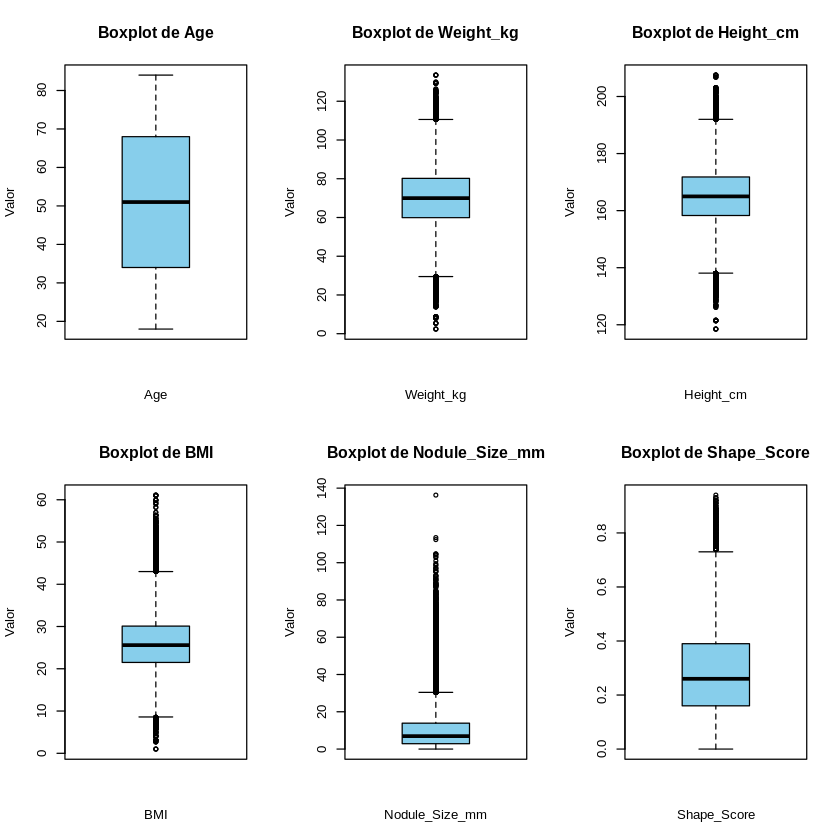

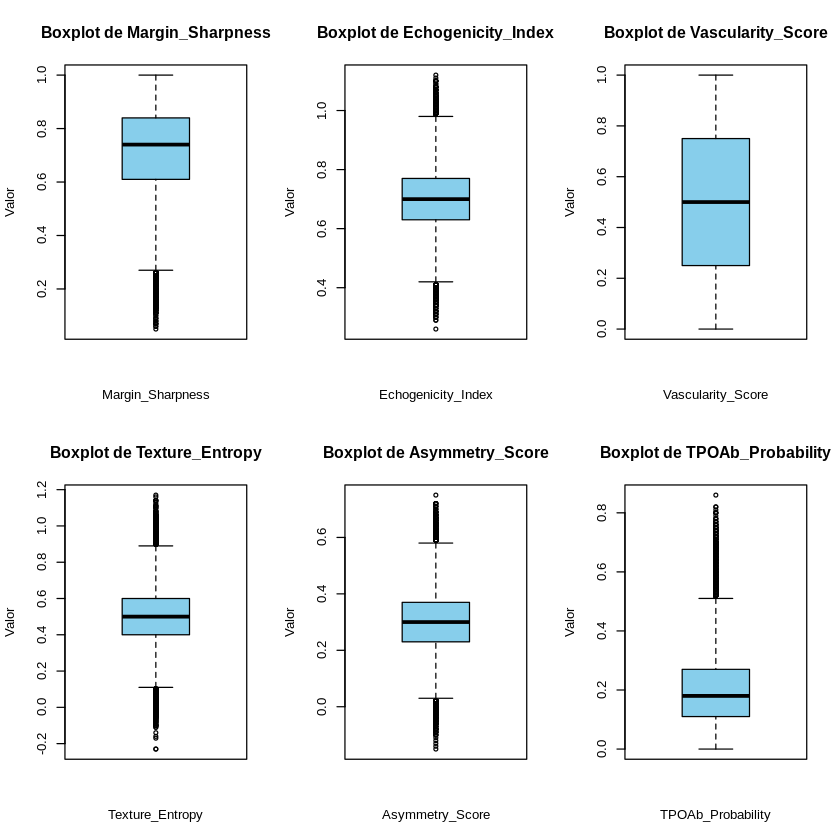

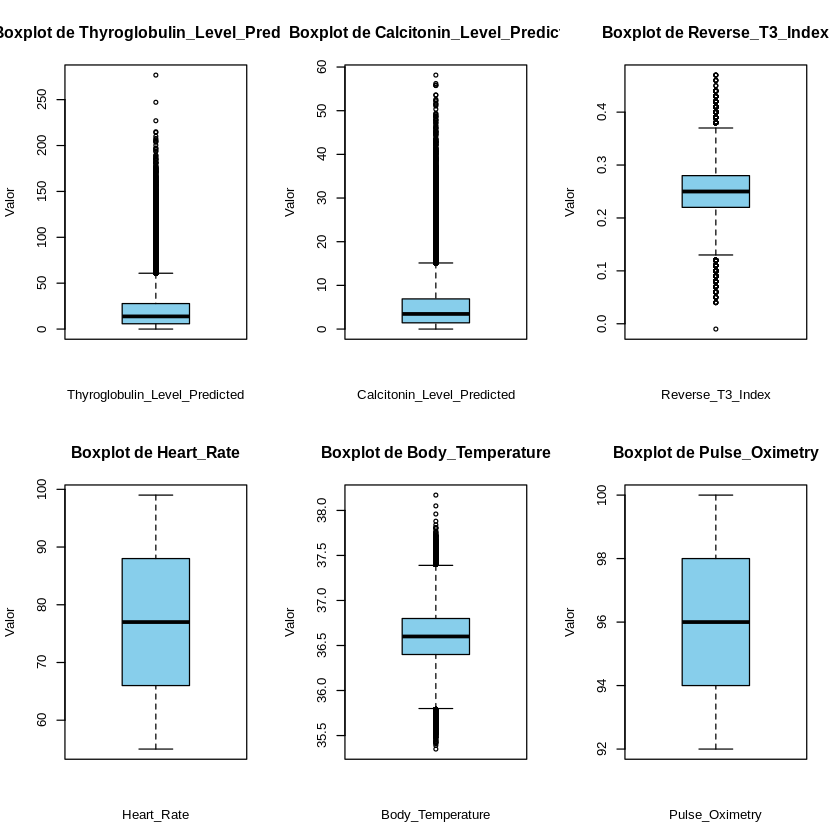

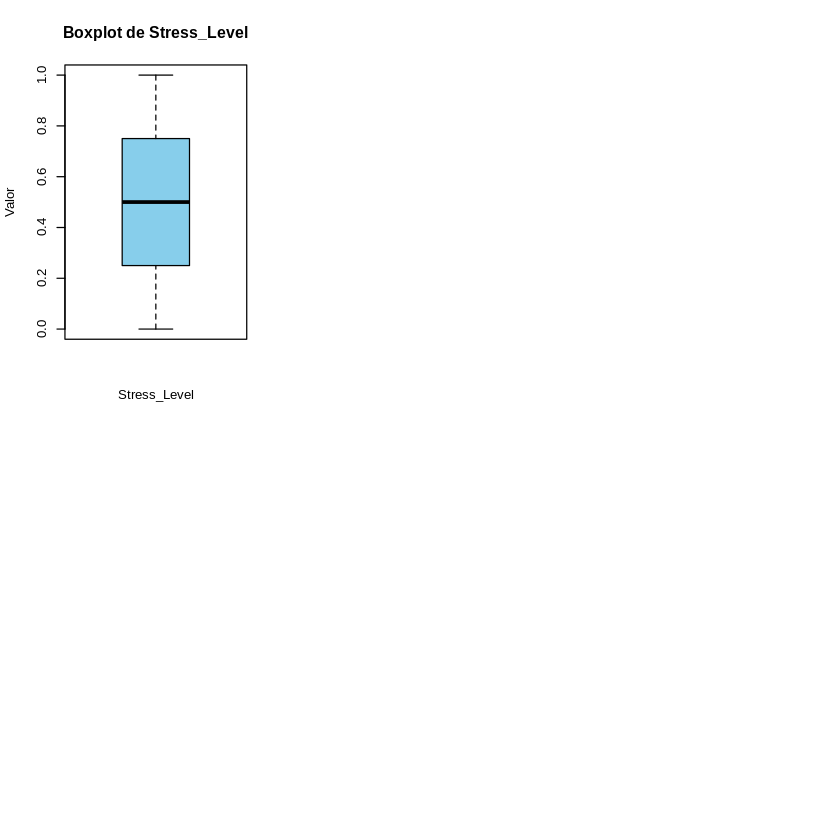

In [12]:
#Detección visual de outliers mediante boxplots

par(mfrow = c(2,3))
for (i in names(data)) {
  if (is.numeric(data[[i]])) {
    boxplot(data[[i]],
            main = paste("Boxplot de", i),
            xlab = i,
            ylab = "Valor",
            col = "skyblue")
  }
}


In [13]:
#Detección de outliers mediante IQR
detect_outliers_iqr <- function(data) {
  outliers <- list()
  for (col_name in names(data)) {
    if (is.numeric(data[[col_name]])) {
      Q1 <- quantile(data[[col_name]], 0.25, na.rm = TRUE)
      Q3 <- quantile(data[[col_name]], 0.75, na.rm = TRUE)
      IQR <- Q3 - Q1
      lower_bound <- Q1 - 1.5 * IQR
      upper_bound <- Q3 + 1.5 * IQR
      outliers[[col_name]] <- data[[col_name]][data[[col_name]] < lower_bound | data[[col_name]] > upper_bound]
    }
  }
  return(outliers)
}

#Llamar la función para todas las variables numéricas existentes
outliers_data <- detect_outliers_iqr(data)
outliers_data

#Contar número total de outliers que hay para cada variable numérica
lapply(outliers_data,length)


$Age
integer(0)

$Weight_kg
   [1]  26.5  26.5  26.5  26.5  26.5  21.4  21.4  21.4 112.0 112.0 125.0 125.0
  [13]  28.0  28.0 118.6 118.6  24.1  24.1  24.1  26.8  26.8  26.8 110.7 110.7
  [25] 110.7 110.7  16.6  16.6  16.6  16.6  16.6 112.3 112.3 112.3  27.4  27.4
  [37]  27.4  27.4 125.0 125.0 125.0 125.0 125.0 116.3 116.3 116.3  22.6  22.6
  [49]  22.6  22.6  22.6  28.6  28.6  28.6  28.6  23.0  23.0  27.5  27.5  29.1
  [61]  29.1  29.1  29.1  29.1  25.3  25.3  25.3  25.3 114.1 114.1 114.1  27.8
  [73]  27.8  27.8  27.8  27.8  26.4  26.4 111.3 111.3 115.4 115.4 115.4 115.4
  [85] 117.9 117.9 117.9 117.9  23.4  23.4  23.4  23.4 113.1 113.1  22.3  22.3
  [97]  22.3  22.3  22.3  15.6  15.6  15.6  25.7  25.7  25.7  25.7  25.7 112.1
 [109] 112.1  28.8  28.8  28.8  28.8  28.8  28.2  28.2  28.2  28.2  28.2  28.2
 [121]  28.2  28.2  28.2 116.3 116.3 116.3 119.5 119.5  28.5  28.5   8.8   8.8
 [133]   8.8   8.8 110.7 110.7 110.7  25.4  25.4  25.4 111.6 111.6  23.1  23.1
 [145]  23.1  23.1  23.1  24.3  24.3  24.3  24.3 114.4 114.4 114.4 114.4 114.4
 [157]  21.1  21.1  21.1  21.1  14.0  14.0  14.0  14.0  14.0  26.5  26.5  26.5
 [169]  26.5  21.8  21.8 114.0 114.0 111.6 111.6 111.6 111.6 111.6 114.6 114.6
 [181] 114.6 114.6  27.7  27.7  27.7  27.7  27.7  22.8  22.8  22.8  23.9  23.9
 [193]  23.9 115.1 115.1 115.1  28.9  28.9  28.9  28.9  26.8  26.8  26.8  26.8
 [205]  26.8 119.5 119.5 110.7 110.7 110.7 116.3 116.3 116.3 116.3 116.3 120.6
 [217] 120.6 114.9 114.9 116.0 116.0 124.8 124.8 124.8 124.8 124.8  28.7  28.7
 [229]  28.7  28.7 115.2 115.2  28.7  28.7 115.8 115.8 115.8 113.1 113.1 118.5
 [241] 118.5 118.5 118.5  26.3  26.3  26.3  26.3  26.3 111.4 111.4 111.4 111.4
 [253] 111.4 114.3 114.3  25.2  25.2  25.2  14.9  14.9  14.9  14.9  23.6  23.6
 [265]  23.6 129.4 129.4 129.4 129.4 129.4 114.2 114.2 114.2 114.2  25.3  25.3
 [277]  27.2  27.2  27.2  27.2  27.6  27.6  27.6  24.9  24.9  24.9  24.9  24.9
 [289]  21.6  21.6  21.6  21.6 114.0 114.0 114.0  27.5  27.5  27.5  27.5  19.0
 [301]  19.0  19.0  26.3  26.3  26.3  27.8  27.8  25.2  25.2  25.2  25.2  27.5
 [313]  27.5  27.5 112.3 112.3 112.3 112.3 112.3  28.7  28.7 111.9 111.9 111.9
 [325] 111.9 113.7 113.7 113.7  28.7  28.7  26.2  26.2  26.2  26.2  26.2 121.5
 [337] 121.5  25.1  25.1  25.1  25.1 113.2 113.2  24.1  24.1  24.1  26.9  26.9
 [349]  26.9 114.4 114.4  22.9  22.9  22.9  19.8  19.8  19.8  27.4  27.4  27.4
 [361]  27.4 116.8 116.8 113.6 113.6 113.6 113.6 113.6 111.7 111.7 111.7 111.7
 [373]  22.0  22.0  22.0  22.0  21.4  21.4  21.4  21.4  21.4 118.6 118.6 113.5
 [385] 113.5  26.8  26.8  28.4  28.4  28.4  28.4  28.8  28.8  28.8  28.8  28.8
 [397]  23.9  23.9  23.9  23.9  23.9 111.7 111.7 112.2 112.2 112.2 110.9 110.9
 [409] 113.1 113.1 113.1 113.1 113.1  24.6  24.6  24.6  24.6 111.5 111.5 114.7
 [421] 114.7 110.7 110.7 110.7 110.7 110.8 110.8 110.8 110.8  27.3  27.3  27.3
 [433]  27.3  27.3  23.6  23.6  23.6  23.6 116.8 116.8 112.0 112.0 116.6 116.6
 [445] 116.6 116.6 116.6  25.2  25.2  25.2  25.2  24.0  24.0 114.8 114.8  28.5
 [457]  28.5  28.5  28.5 115.3 115.3 115.3 115.3 113.6 113.6 113.6 113.6 113.6
 [469] 112.1 112.1 112.1 112.1 112.1 112.1 115.4 115.4 115.4 115.4 115.4  27.9
 [481]  27.9  27.9  27.9 118.3 118.3 118.3 117.7 117.7 117.7 117.7 113.9 113.9
 [493] 113.9 111.1 111.1 111.1  28.5  28.5  28.5  25.3  25.3  25.3  25.3  27.2
 [505]  27.2  27.2  27.2  27.2 116.3 116.3  18.8  18.8  18.8  18.8  18.8 111.4
 [517] 111.4 111.4 111.4 111.4 112.4 112.4 112.4 112.4 119.8 119.8 129.9 129.9
 [529]  25.4  25.4  25.4  25.4  25.4  24.4  24.4 119.6 119.6 115.5 115.5 115.5
 [541] 115.5 113.5 113.5 113.5 113.5 124.2 124.2 124.2 124.2 124.2 115.3 115.3
 [553] 115.3  16.8  16.8 114.6 114.6  21.3  21.3  21.3  21.3 115.4 115.4 115.4
 [565]  28.2  28.2 116.0 116.0 126.3 126.3  29.3  29.3  29.3  29.3 113.5 113.5
 [577] 113.5  28.9  28.9  28.9 114.6 114.6 111.1 111.1 111.1 111.1 111.1  29.2
 [589]  29.2  29.2  29.2  23.1  23.1  29.0  29.0  29.0  29.0 111.2 111.2 118.8
 [601] 118.8  22.5  22

$Age
[1] 0

$Weight_kg
[1] 1795

$Height_cm
[1] 1932

$BMI
[1] 2861

$Nodule_Size_mm
[1] 13372

$Shape_Score
[1] 1615

$Margin_Sharpness
[1] 1680

$Echogenicity_Index
[1] 1192

$Vascularity_Score
[1] 0

$Texture_Entropy
[1] 2289

$Asymmetry_Score
[1] 1444

$TPOAb_Probability
[1] 4389

$Thyroglobulin_Level_Predicted
[1] 13543

$Calcitonin_Level_Predicted
[1] 13729

$Reverse_T3_Index
[1] 3441

$Heart_Rate
[1] 0

$Body_Temperature
[1] 2187

$Pulse_Oximetry
[1] 0

$Stress_Level
[1] 0

Tras realizar la detección de outliers, se procede a su eliminación. El criterio escogido es eliminar outliers únicamente es base a la variable **Peso (kg)**, puesto que el resto de variables numéricas son concentraciones de hormonas o valores de escalas para las cuales los valores podrían resultar dispares y anormales debido al estado de enfermedad de los pacientes. Teniendo en cuenta que la edad mínima presente en el dataset es 18 años, resulta evidente que valores de por ejemplo 2,4kg son totalmente imposibles. De nuevo teniendo en cuenta que son personas en un estado de una enfermedad con probabilidad de tener efectos sobre el metabolismo, se decide eliminar todas aquellas observaciones que muestren un peso menor a 20kg.

In [16]:
#Eliminar los outliers
data <- sqldf("select *
      from data
      where Weight_kg > 20")
str(data)

'data.frame':	279920 obs. of  33 variables:
 $ Patient_ID                   : chr  "P0001" "P0001" "P0001" "P0001" ...
 $ Visit_Number                 : Factor w/ 5 levels "1","2","3","4",..: 1 2 3 4 1 2 3 4 5 1 ...
 $ Scan_Type                    : Factor w/ 3 levels "Elastography",..: 3 2 3 3 3 3 3 3 2 3 ...
 $ Age                          : int  82 82 82 82 51 51 51 51 51 29 ...
 $ Gender                       : Factor w/ 2 levels "Female","Male": 1 1 1 1 1 1 1 1 1 1 ...
 $ Weight_kg                    : num  66.2 66.2 66.2 66.2 26.5 26.5 26.5 26.5 26.5 39.8 ...
 $ Height_cm                    : num  158 158 158 158 169 ...
 $ BMI                          : num  26.4 26.4 26.4 26.4 9.2 9.2 9.2 9.2 9.2 18.3 ...
 $ Family_History               : Factor w/ 2 levels "No","Yes": 2 2 2 2 2 2 2 2 2 1 ...
 $ Smoking_Status               : Factor w/ 3 levels "Former Smoker",..: 2 2 2 2 2 2 2 2 2 2 ...
 $ Radiation_Exposure           : Factor w/ 2 levels "No","Yes": 1 1 1 1 1 1 1 1 1 1 ...
 $

###*Estadística descriptiva*

In [ ]:
#Estadística descriptiva de las variables
summary(data)

###*Visualización de datos*

'data.frame':	279920 obs. of  12 variables:
 $ Visit_Number               : Factor w/ 5 levels "1","2","3","4",..: 1 2 3 4 1 2 3 4 5 1 ...
 $ Scan_Type                  : Factor w/ 3 levels "Elastography",..: 3 2 3 3 3 3 3 3 2 3 ...
 $ Gender                     : Factor w/ 2 levels "Female","Male": 1 1 1 1 1 1 1 1 1 1 ...
 $ Family_History             : Factor w/ 2 levels "No","Yes": 2 2 2 2 2 2 2 2 2 1 ...
 $ Smoking_Status             : Factor w/ 3 levels "Former Smoker",..: 2 2 2 2 2 2 2 2 2 2 ...
 $ Radiation_Exposure         : Factor w/ 2 levels "No","Yes": 1 1 1 1 1 1 1 1 1 1 ...
 $ Calcification_Presence     : Factor w/ 2 levels "No","Yes": 1 1 2 1 1 1 2 1 1 1 ...
 $ Capsular_Invasion_Indicator: Factor w/ 2 levels "No","Yes": 1 1 1 2 1 1 1 1 1 2 ...
 $ TSH_Risk_Level             : Factor w/ 3 levels "High","Low","Normal": 1 3 3 2 3 3 3 3 2 3 ...
 $ Medication_Adherence       : Factor w/ 2 levels "No","Yes": 1 2 1 1 1 1 2 1 1 1 ...
 $ Diagnosis_Label            : Factor w/ 2 lev

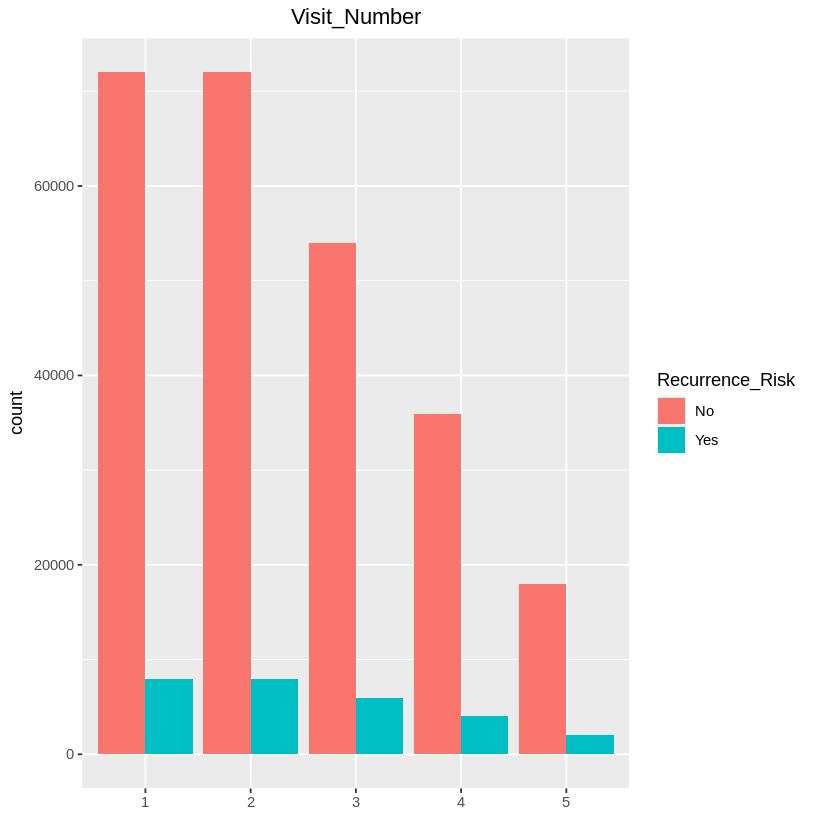

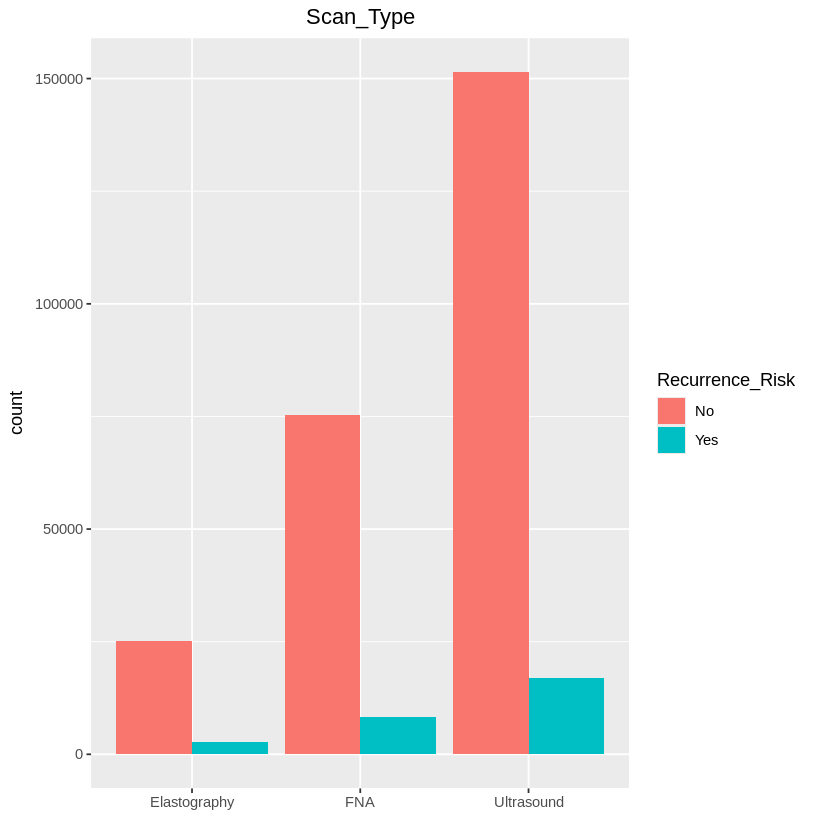

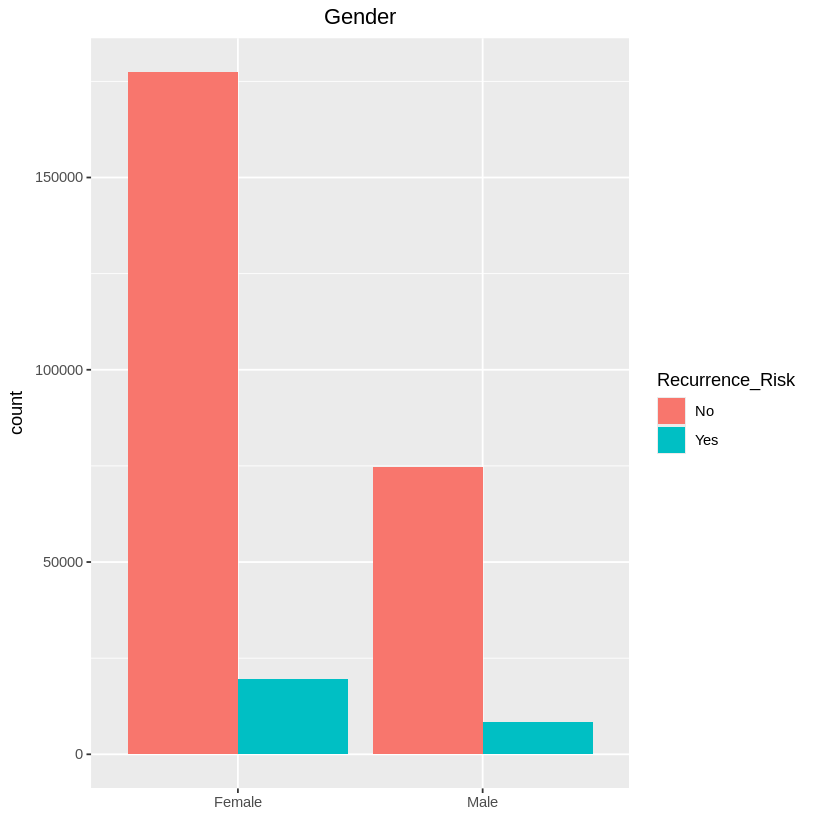

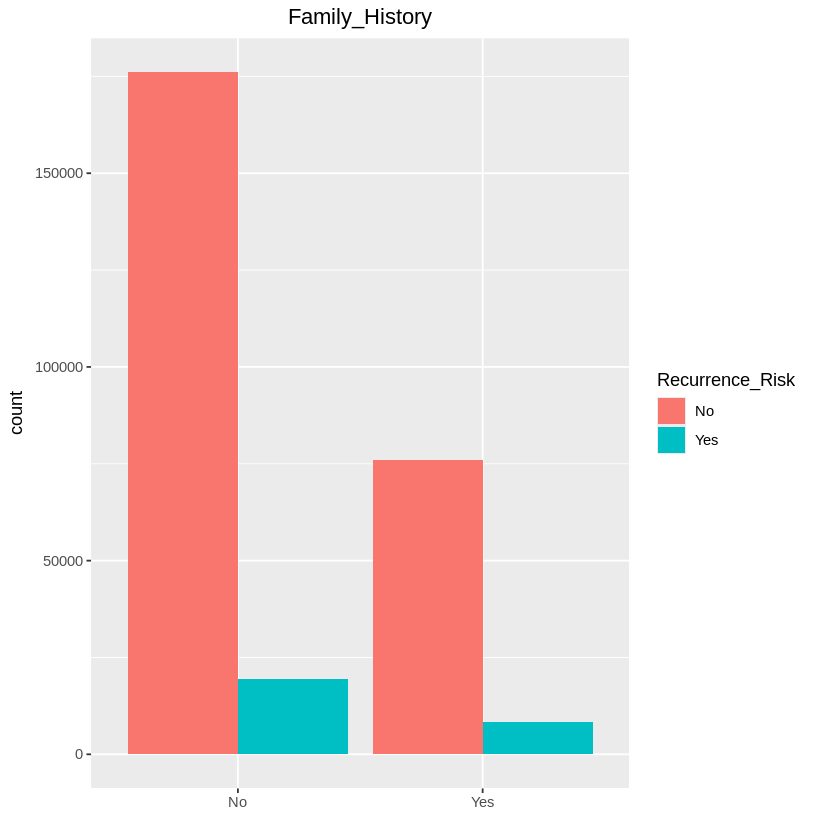

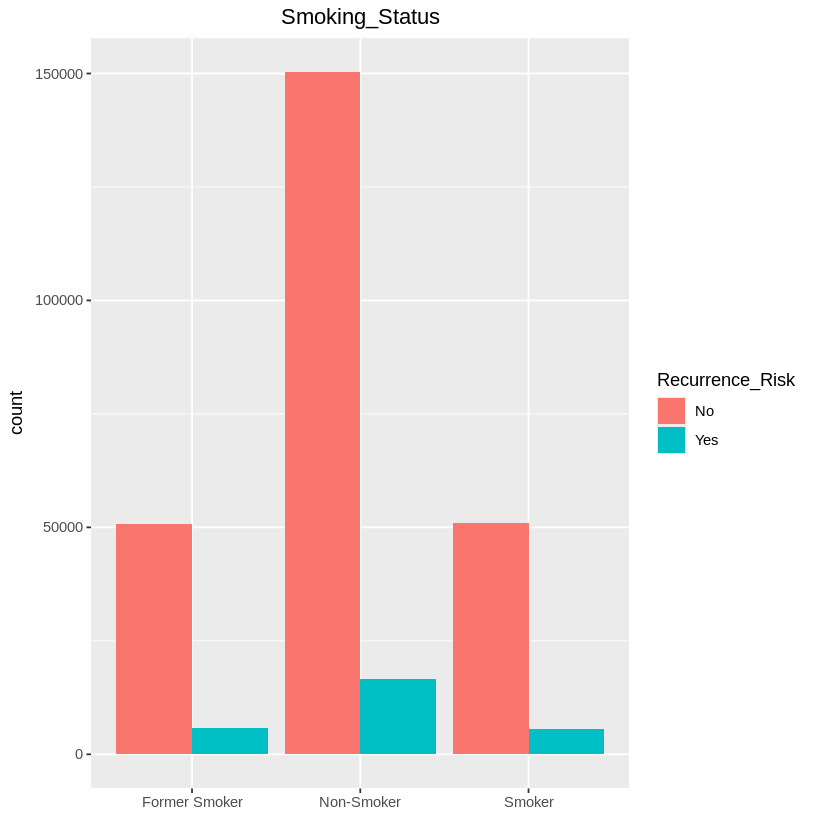

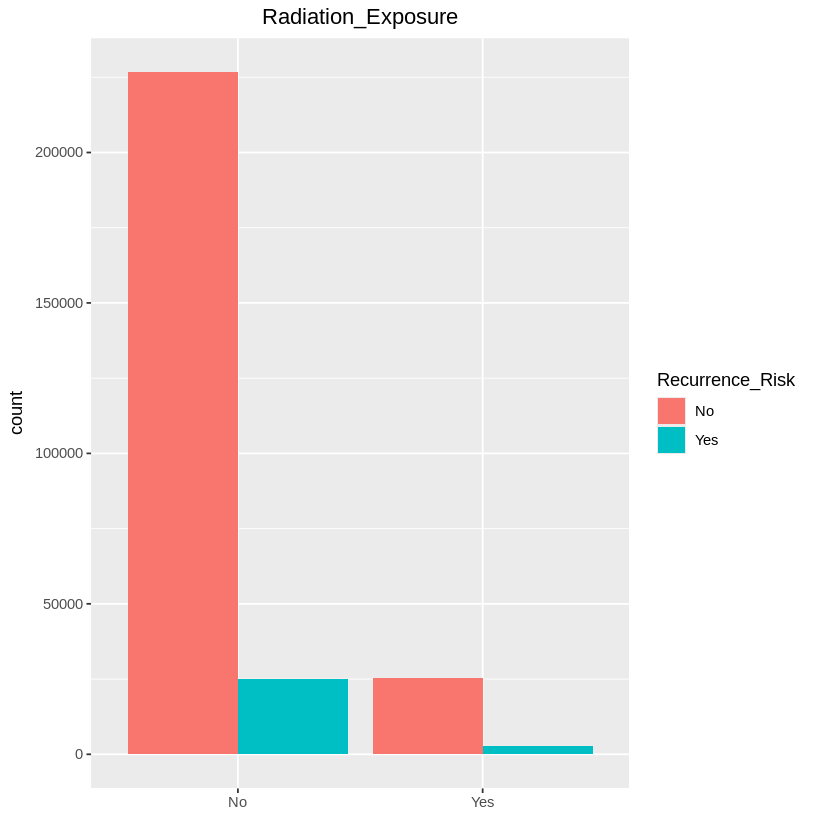

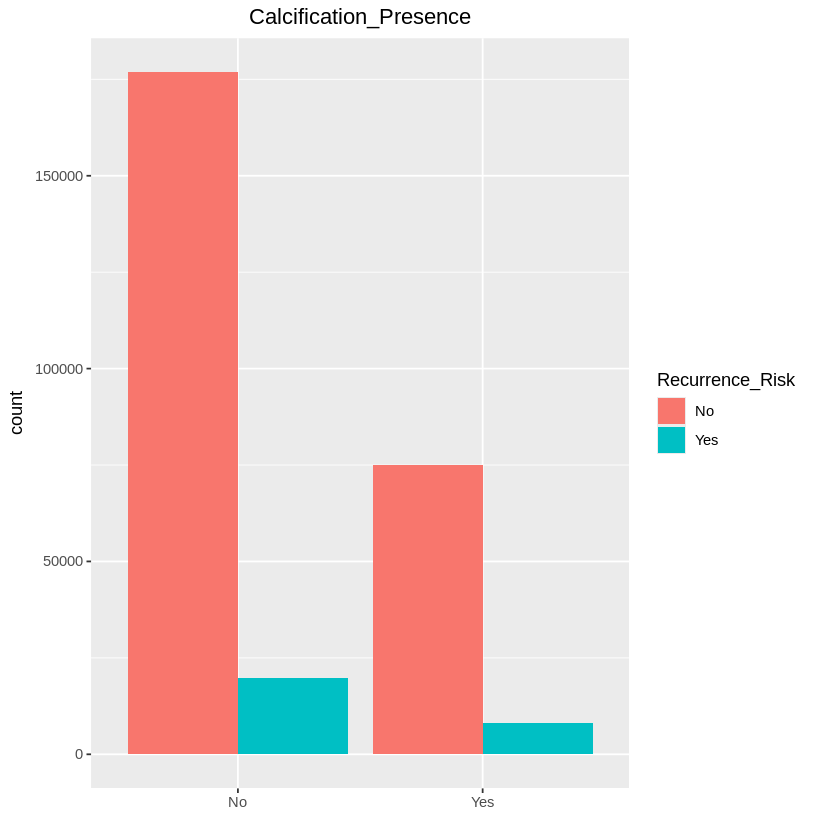

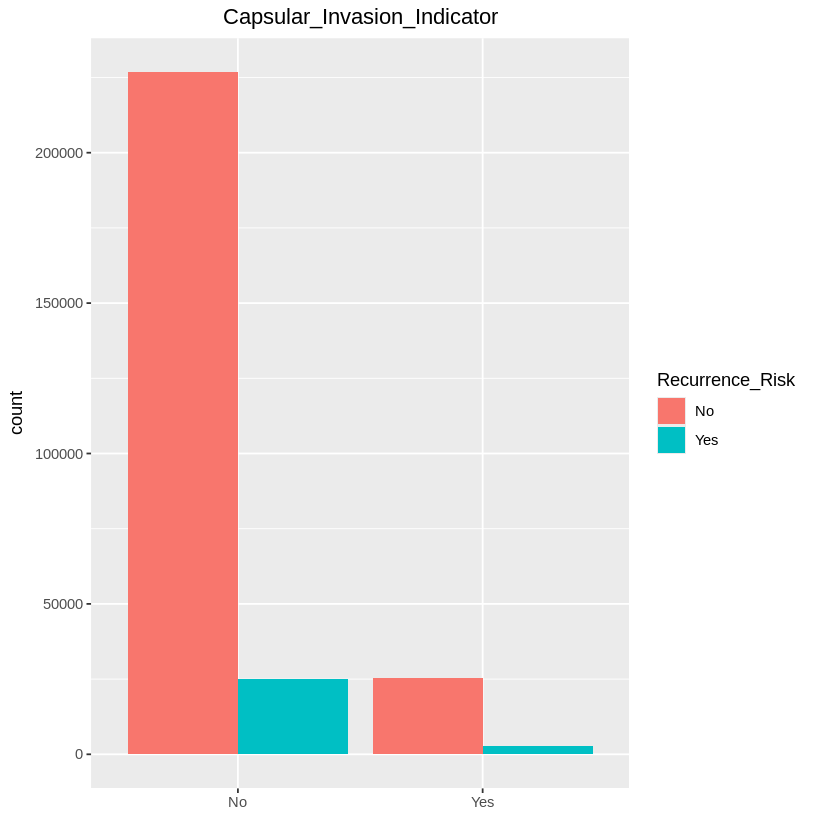

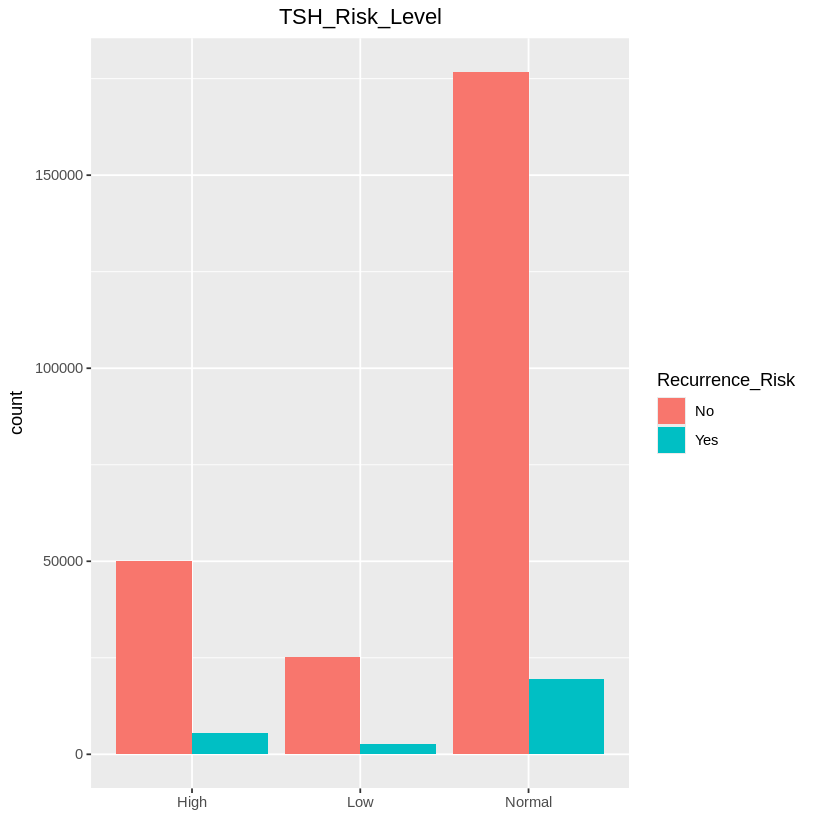

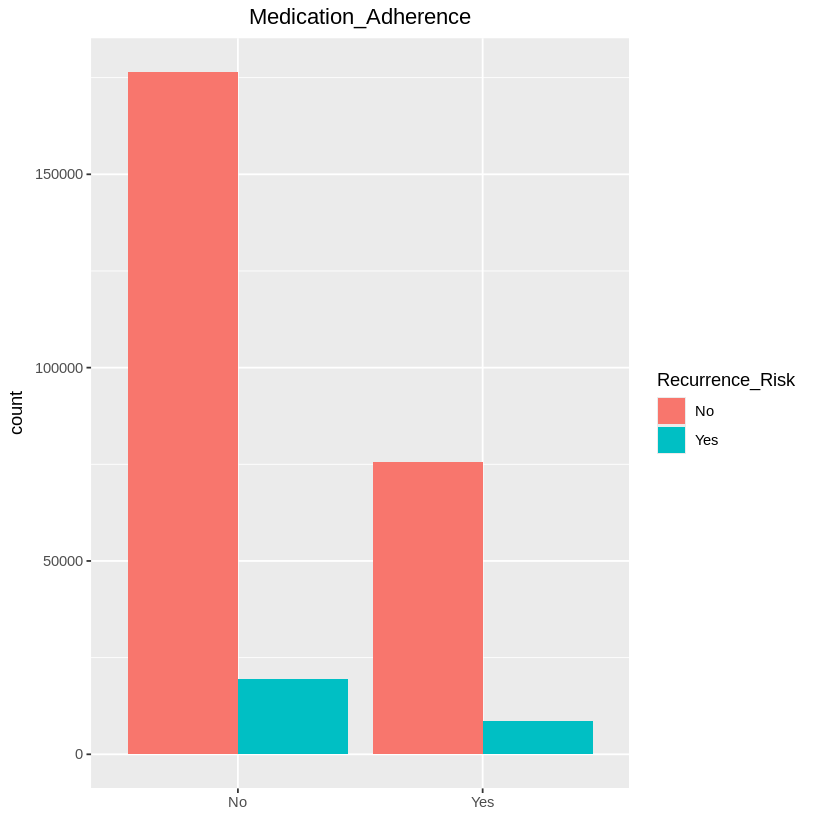

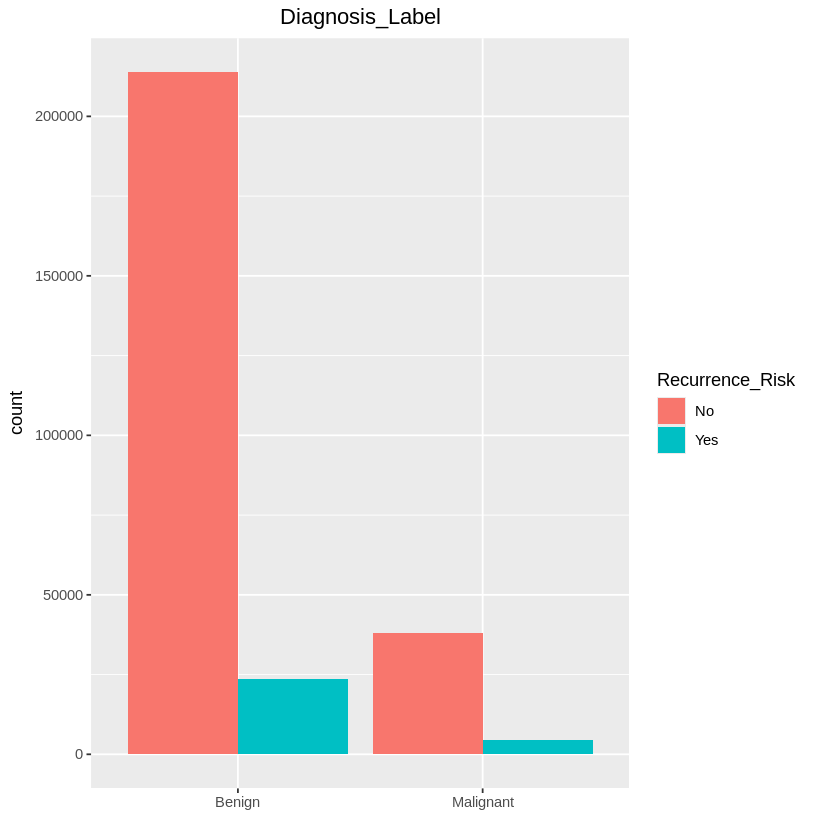

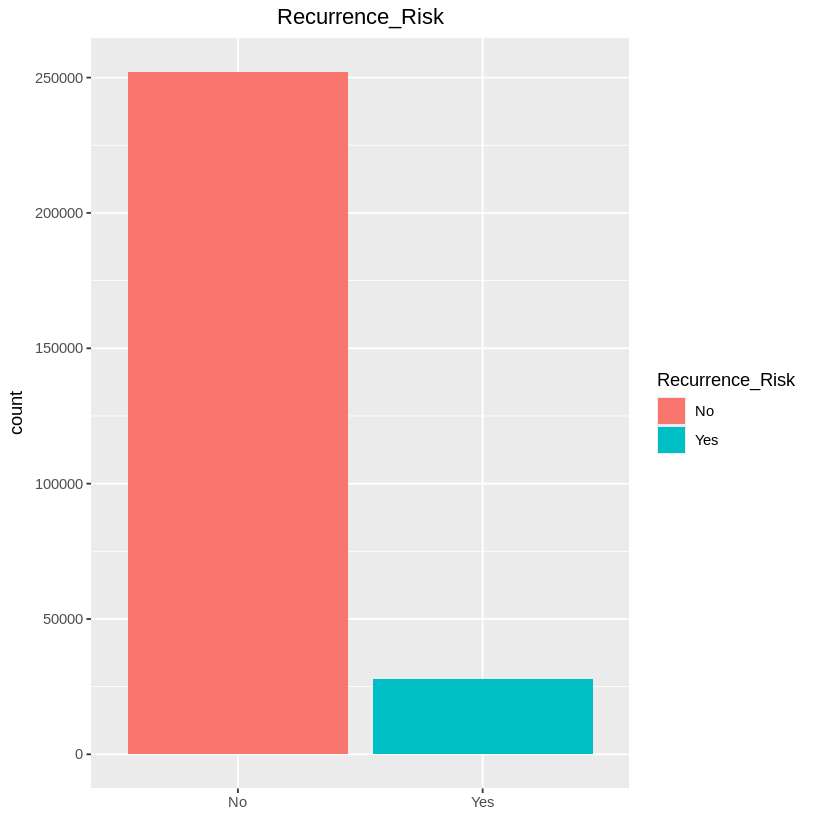

In [66]:
#Creación de gráficos de barras en según el riesgo de recidiva

factorvar<-data%>%
  select_if(is.factor)
str(factorvar)

par(mfrow=c(3,4))
for(i in names(factorvar)) {
  p<-ggplot(data, aes(factorvar[[i]],fill=Recurrence_Risk))+
  geom_bar(position="dodge")+
  labs(title=i,x="")+
  theme(plot.title = element_text(hjust = 0.5))

print(p)
}

'data.frame':	279920 obs. of  12 variables:
 $ Visit_Number               : Factor w/ 5 levels "1","2","3","4",..: 1 2 3 4 1 2 3 4 5 1 ...
 $ Scan_Type                  : Factor w/ 3 levels "Elastography",..: 3 2 3 3 3 3 3 3 2 3 ...
 $ Gender                     : Factor w/ 2 levels "Female","Male": 1 1 1 1 1 1 1 1 1 1 ...
 $ Family_History             : Factor w/ 2 levels "No","Yes": 2 2 2 2 2 2 2 2 2 1 ...
 $ Smoking_Status             : Factor w/ 3 levels "Former Smoker",..: 2 2 2 2 2 2 2 2 2 2 ...
 $ Radiation_Exposure         : Factor w/ 2 levels "No","Yes": 1 1 1 1 1 1 1 1 1 1 ...
 $ Calcification_Presence     : Factor w/ 2 levels "No","Yes": 1 1 2 1 1 1 2 1 1 1 ...
 $ Capsular_Invasion_Indicator: Factor w/ 2 levels "No","Yes": 1 1 1 2 1 1 1 1 1 2 ...
 $ TSH_Risk_Level             : Factor w/ 3 levels "High","Low","Normal": 1 3 3 2 3 3 3 3 2 3 ...
 $ Medication_Adherence       : Factor w/ 2 levels "No","Yes": 1 2 1 1 1 1 2 1 1 1 ...
 $ Diagnosis_Label            : Factor w/ 2 lev

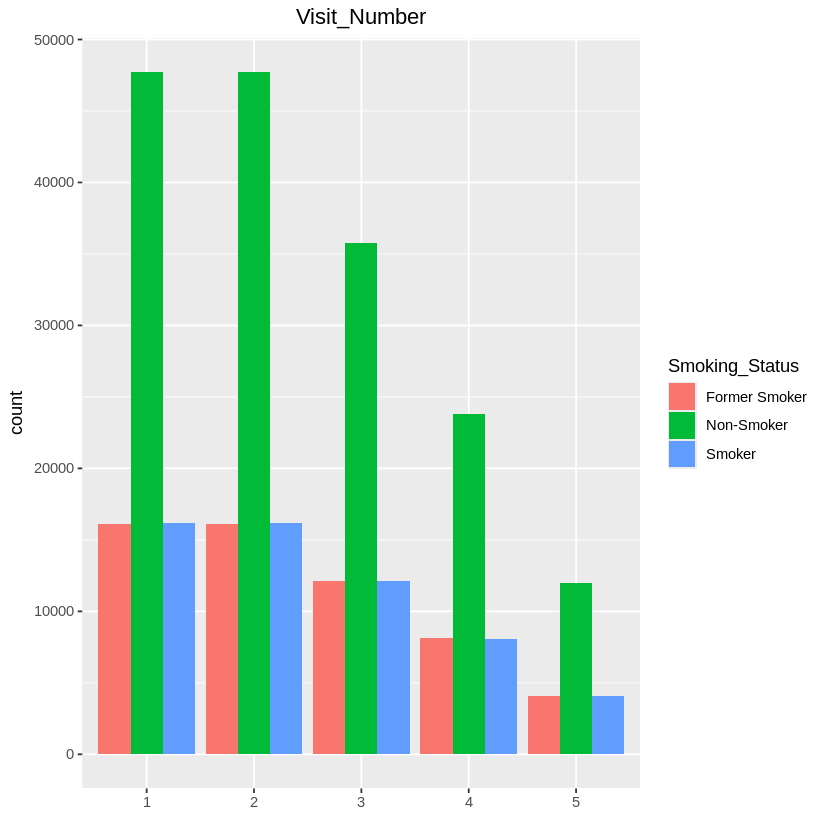

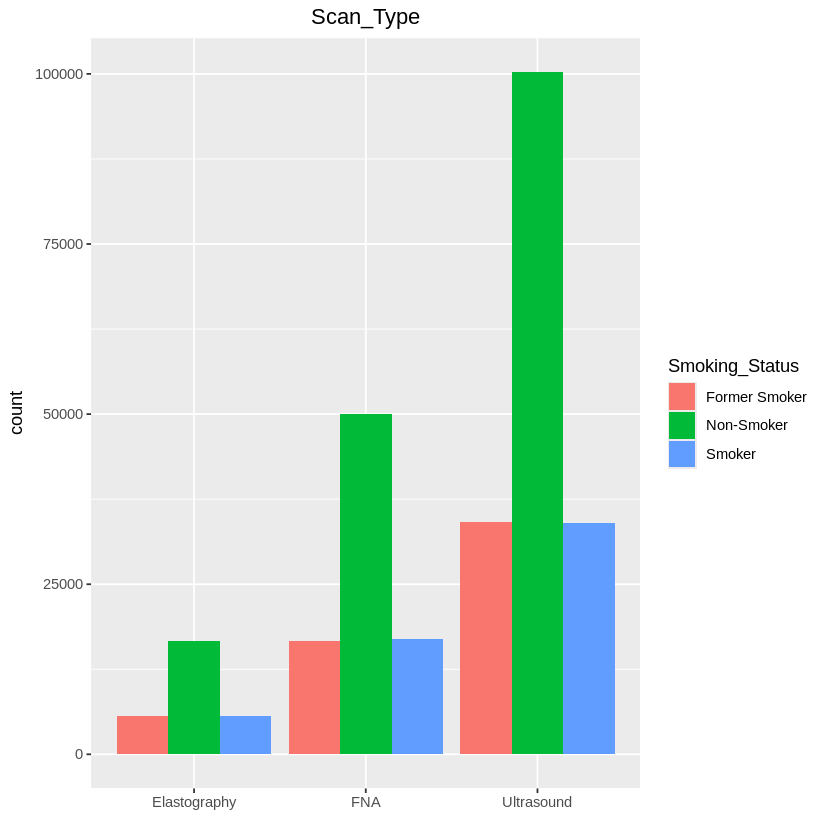

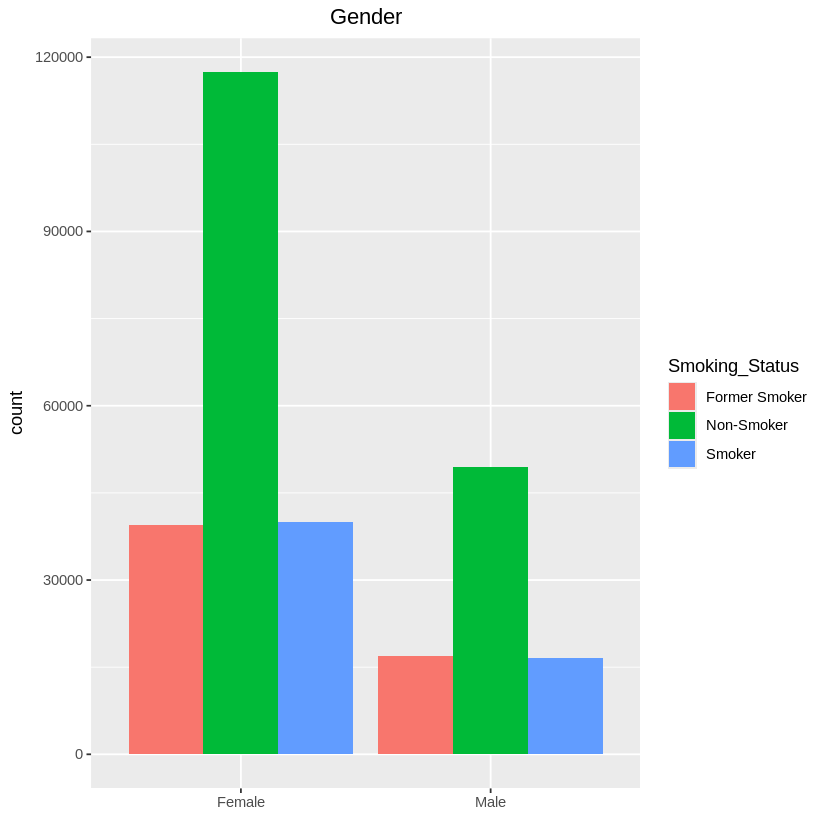

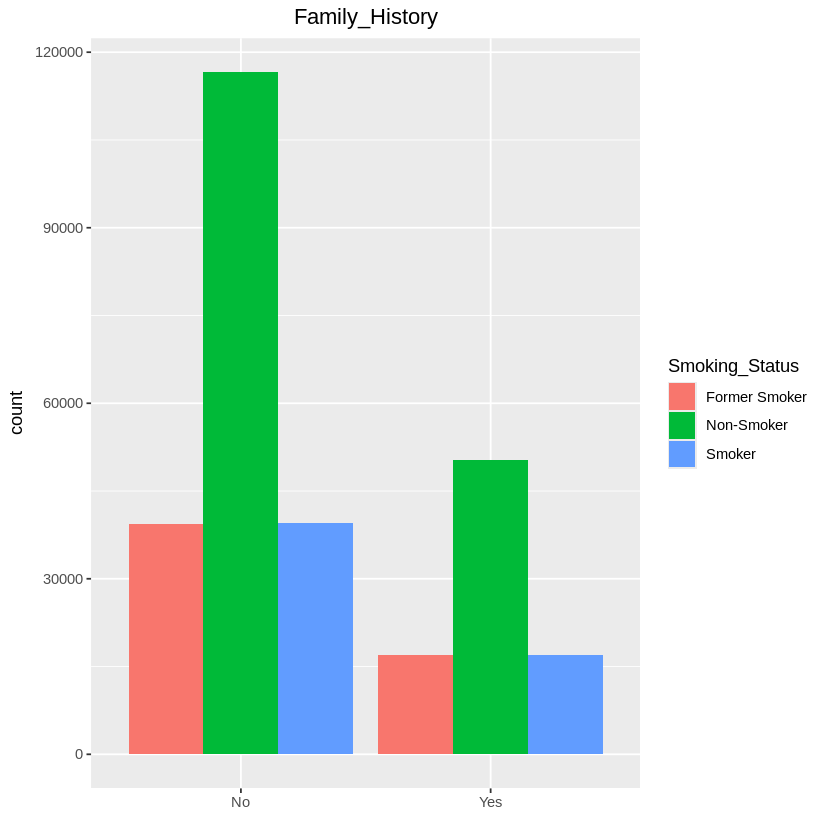

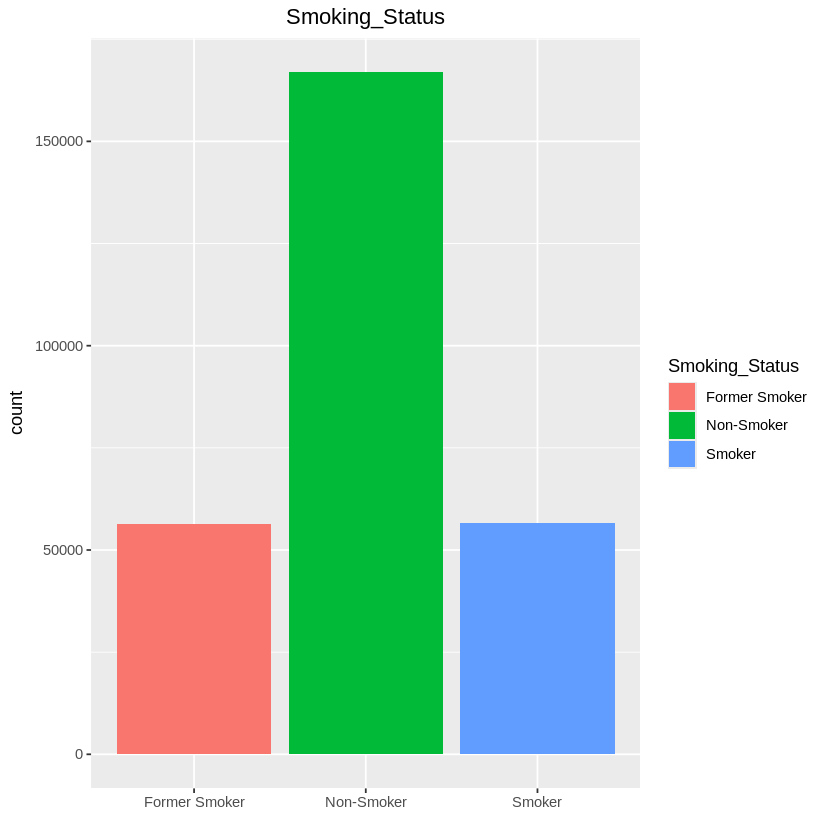

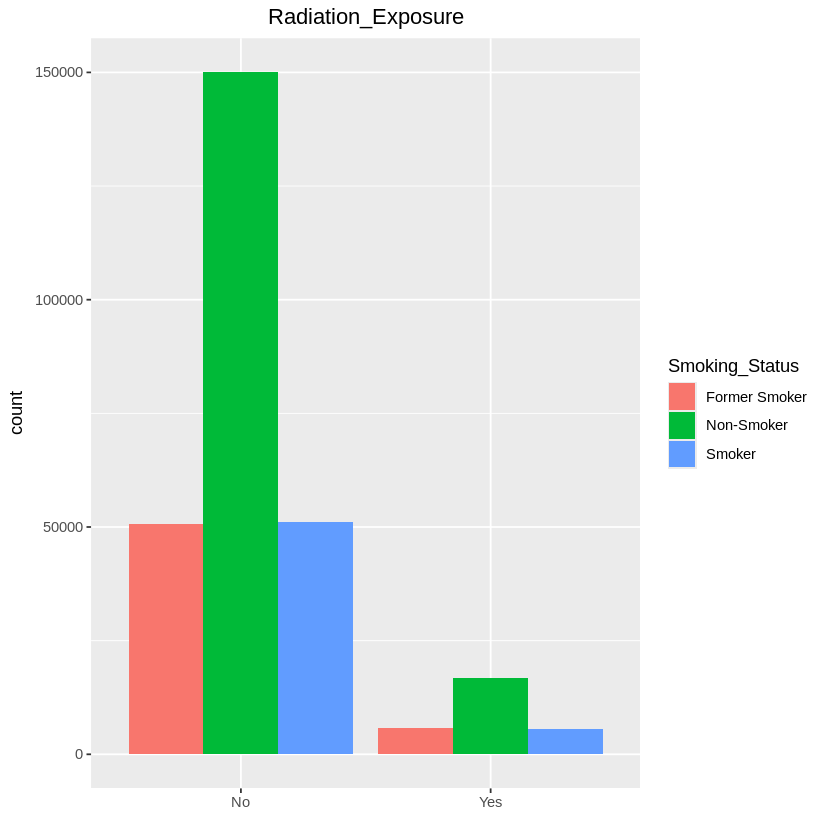

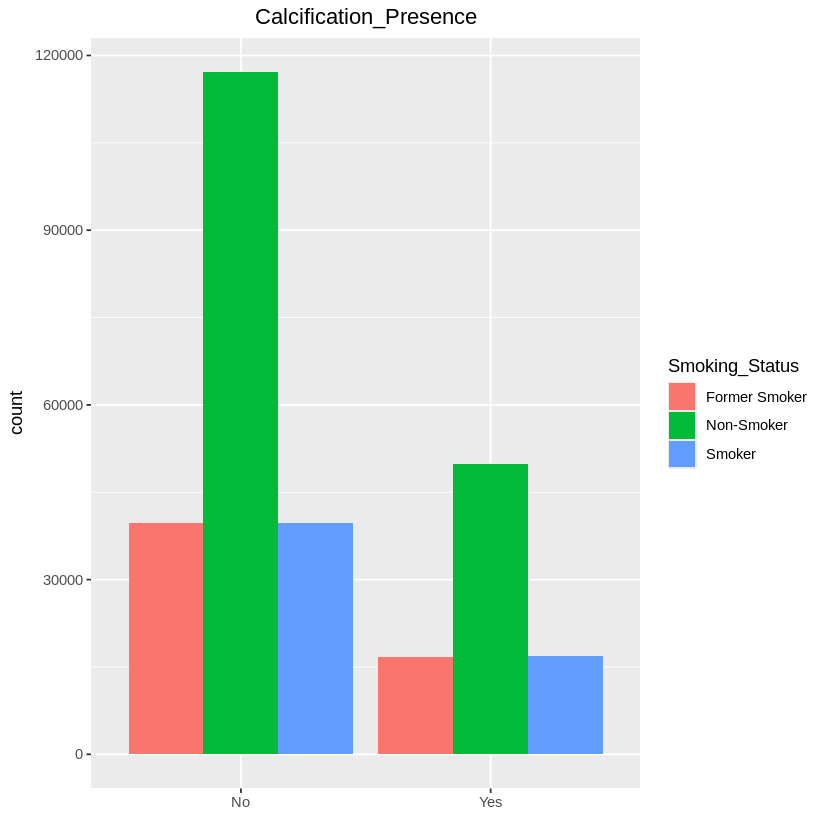

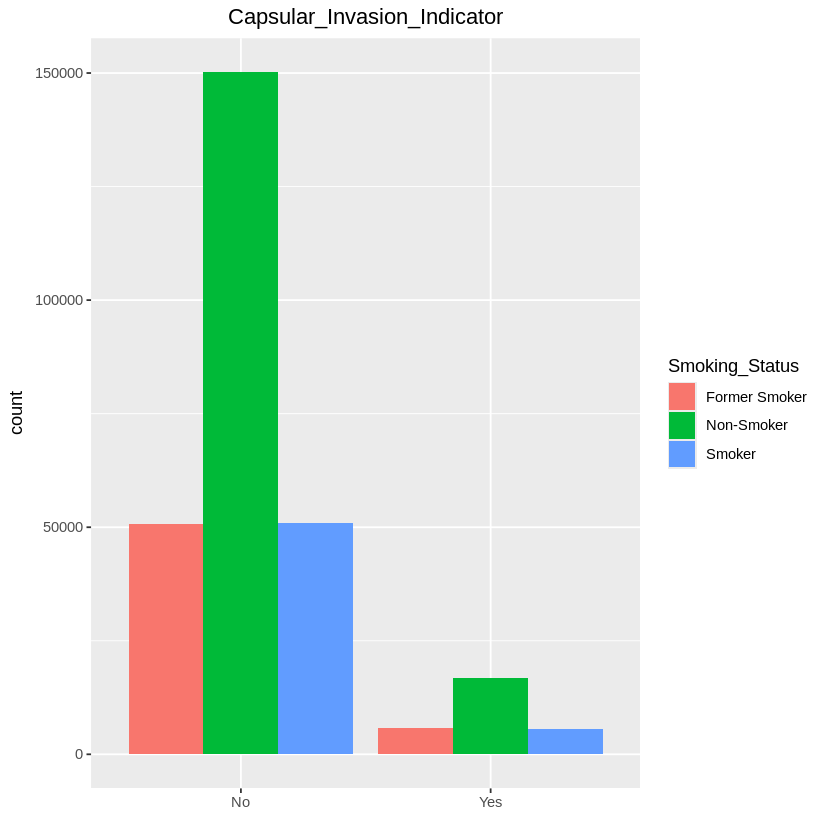

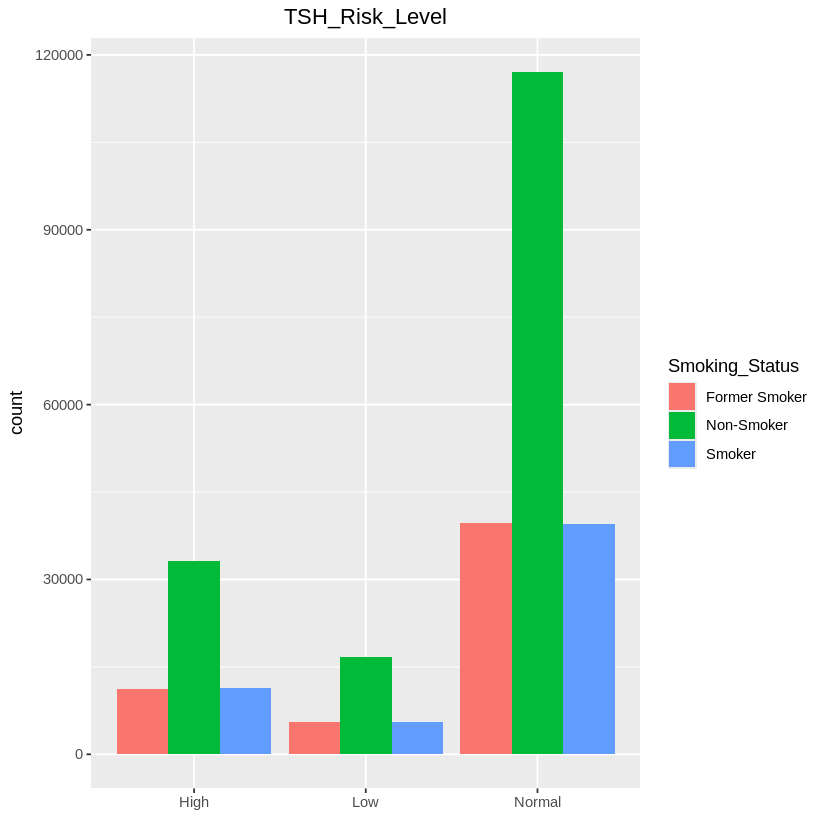

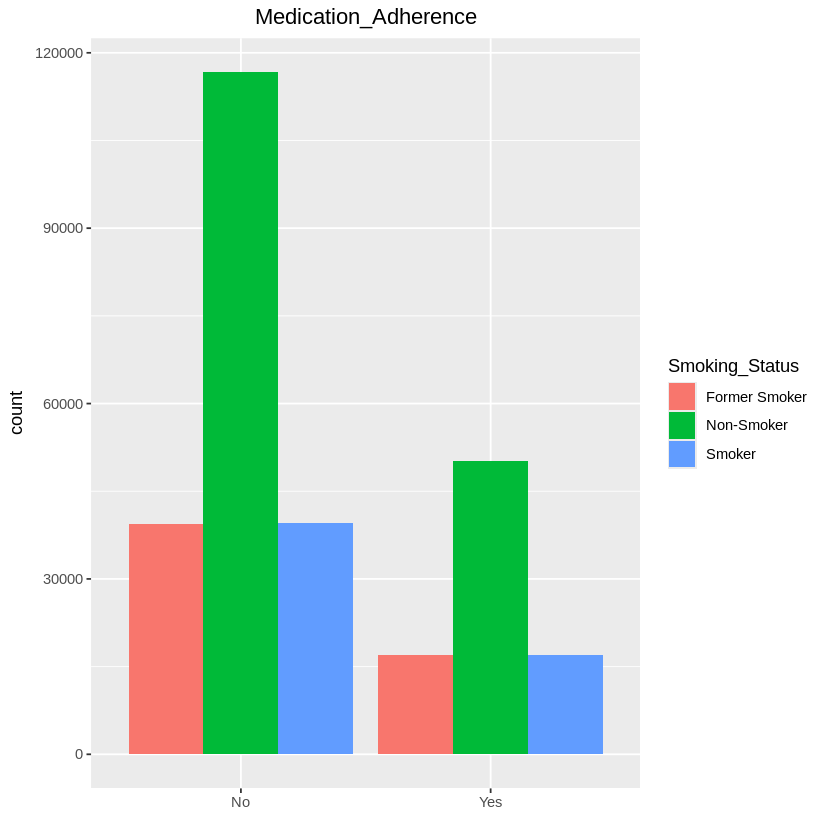

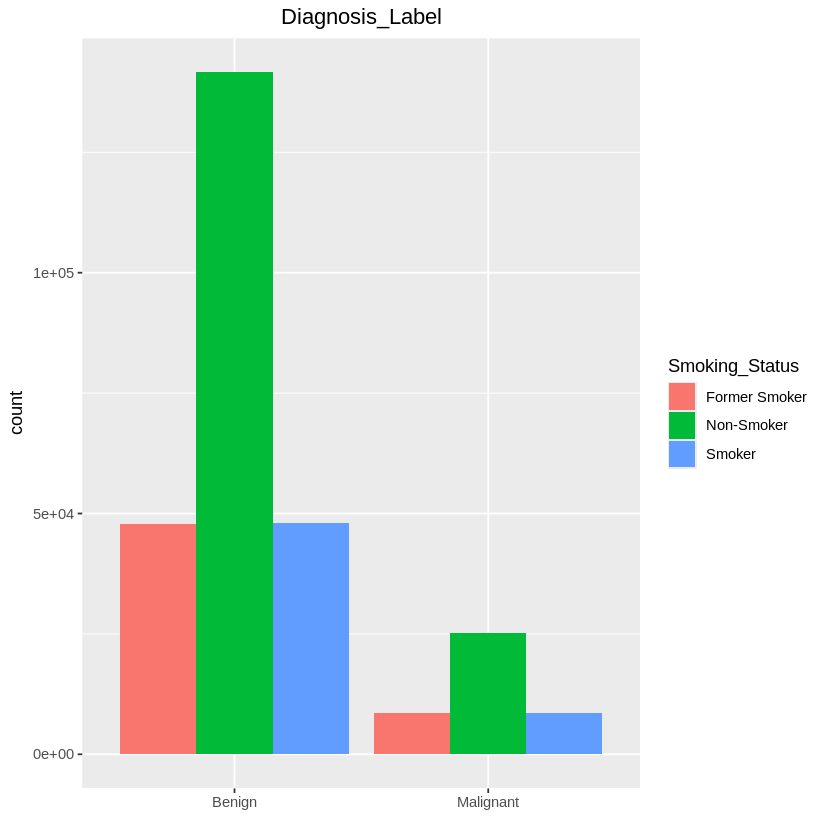

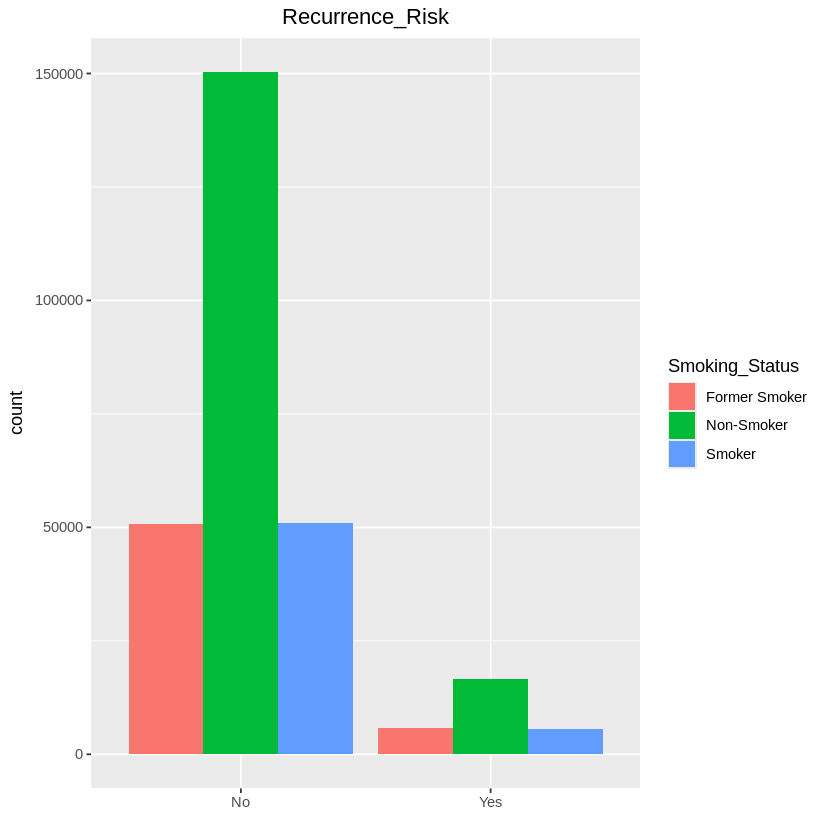

In [62]:
#Creación de gráficos de barras según la situación de fumador

factorvar<-data%>%
  select_if(is.factor)
str(factorvar)

par(mfrow=c(3,4))
for(i in names(factorvar)) {
  p<-ggplot(data, aes(factorvar[[i]],fill=Smoking_Status))+
  geom_bar(position="dodge")+
  labs(title=i,x="")+
  theme(plot.title = element_text(hjust = 0.5))

    print(p)
}

Estudiamos la posible correlación entre las variables numéricas mediante una matriz de correlación.

'data.frame':	279920 obs. of  19 variables:
 $ Age                          : int  82 82 82 82 51 51 51 51 51 29 ...
 $ Weight_kg                    : num  66.2 66.2 66.2 66.2 26.5 26.5 26.5 26.5 26.5 39.8 ...
 $ Height_cm                    : num  158 158 158 158 169 ...
 $ BMI                          : num  26.4 26.4 26.4 26.4 9.2 9.2 9.2 9.2 9.2 18.3 ...
 $ Nodule_Size_mm               : num  27.05 7.8 4.92 12.04 2.73 ...
 $ Shape_Score                  : num  0.16 0.17 0.3 0.37 0.56 0.62 0.21 0.71 0.33 0.3 ...
 $ Margin_Sharpness             : num  0.88 0.93 0.79 0.84 0.63 0.53 0.83 0.83 0.75 0.85 ...
 $ Echogenicity_Index           : num  0.83 0.7 0.77 0.77 0.67 0.7 0.72 0.6 0.71 0.62 ...
 $ Vascularity_Score            : num  0.65 0.55 0.37 0.82 0.19 0.9 0.09 0.2 0.31 0.66 ...
 $ Texture_Entropy              : num  0.58 0.39 0.48 0.39 0.51 0.45 0.5 0.1 0.19 0.66 ...
 $ Asymmetry_Score              : num  0.35 0.34 0.14 0.35 0.31 0.31 0.31 0.27 0.19 0.31 ...
 $ TPOAb_Probability 

,Age,Weight_kg,Height_cm,BMI,Nodule_Size_mm,Shape_Score,Margin_Sharpness,Echogenicity_Index,Vascularity_Score,Texture_Entropy,Asymmetry_Score,TPOAb_Probability,Thyroglobulin_Level_Predicted,Calcitonin_Level_Predicted,Reverse_T3_Index,Heart_Rate,Body_Temperature,Pulse_Oximetry,Stress_Level
Age,1.000000e+00,-2.666878e-04,-4.724662e-03,0.0031394780,-1.256264e-03,-4.224182e-03,0.0001057510,4.280412e-03,-0.0030154696,-0.0029099386,-0.0022917430,-4.335996e-03,1.596479e-03,-2.082734e-04,1.314526e-03,5.209832e-04,0.0014122396,1.196995e-06,-1.204413e-03
Weight_kg,-2.666878e-04,1.000000e+00,-1.353785e-03,0.8599475597,1.948810e-03,-2.044786e-05,-0.0021754440,-1.484153e-03,0.0005643319,0.0015485243,-0.0013949163,-1.651036e-03,-4.797581e-03,-1.724022e-03,1.240469e-03,-1.083338e-03,0.0008014406,3.217534e-04,2.064316e-03
Height_cm,-4.724662e-03,-1.353785e-03,1.000000e+00,-0.4958919616,1.368162e-03,7.101463e-04,-0.0020153606,1.897509e-04,-0.0011007874,-0.0016645629,0.0001733666,-1.104640e-03,-1.771697e-03,-8.248288e-04,2.212142e-04,6.004751e-05,-0.0022023057,-2.624846e-04,-1.429496e-03
BMI,3.139478e-03,8.599476e-01,-4.958920e-01,1.0000000000,1.249534e-03,-6.689422e-04,-0.0009287723,-1.056638e-03,0.0010426550,0.0022212117,-0.0013751385,-8.623247e-04,-3.081699e-03,-9.770665e-04,7.388986e-04,-1.463340e-03,0.0017868760,4.683970e-04,2.646310e-03
Nodule_Size_mm,-1.256264e-03,1.948810e-03,1.368162e-03,0.0012495336,1.000000e+00,5.188155e-03,0.0018360508,1.496709e-03,-0.0003322941,0.0019882400,0.0017114173,1.496583e-03,-9.984933e-04,5.028457e-03,1.026812e-03,1.508861e-03,0.0011006825,-7.342278e-05,-2.809939e-04
Shape_Score,-4.224182e-03,-2.044786e-05,7.101463e-04,-0.0006689422,5.188155e-03,1.000000e+00,-0.0004930827,-1.804422e-03,-0.0007539013,-0.0019264861,-0.0003475258,4.850345e-04,2.636501e-03,-1.587396e-03,8.635045e-04,3.049876e-03,-0.0017740118,-2.201766e-03,-2.945424e-04
Margin_Sharpness,1.057510e-04,-2.175444e-03,-2.015361e-03,-0.0009287723,1.836051e-03,-4.930827e-04,1.0000000000,3.934720e-04,0.0007481619,-0.0013746028,-0.0026555301,8.092974e-04,-3.238062e-03,-2.286395e-03,1.802111e-03,1.138297e-03,0.0030011173,2.329864e-03,2.391024e-03
Echogenicity_Index,4.280412e-03,-1.484153e-03,1.897509e-04,-0.0010566378,1.496709e-03,-1.804422e-03,0.0003934720,1.000000e+00,0.0007738781,-0.0008743264,-0.0003587861,2.910982e-03,-6.117349e-05,-1.472777e-03,-1.443647e-04,1.280010e-03,0.0019612646,6.750498e-04,5.042314e-03
Vascularity_Score,-3.015470e-03,5.643319e-04,-1.100787e-03,0.0010426550,-3.322941e-04,-7.539013e-04,0.0007481619,7.738781e-04,1.0000000000,-0.0003927768,0.0020377404,-2.161310e-03,-1.261026e-03,4.672145e-03,4.707322e-03,1.317318e-03,-0.0011519306,-2.150267e-03,1.352047e-03
Texture_Entropy,-2.909939e-03,1.548524e-03,-1.664563e-03,0.0022212117,1.988240e-03,-1.926486e-03,-0.0013746028,-8.743264e-04,-0.0003927768,1.0000000000,-0.0005339779,-2.997649e-03,-8.275312e-04,-2.040527e-04,2.345230e-03,2.767144e-03,-0.0012608554,-2.120506e-03,4.063260e-04


,Age,Weight_kg,Height_cm,BMI,Nodule_Size_mm,Shape_Score,Margin_Sharpness,Echogenicity_Index,Vascularity_Score,Texture_Entropy,Asymmetry_Score,TPOAb_Probability,Thyroglobulin_Level_Predicted,Calcitonin_Level_Predicted,Reverse_T3_Index,Heart_Rate,Body_Temperature,Pulse_Oximetry,Stress_Level
Age,0.0000000,7.527219e-01,0.89124078,8.489380e-01,0.8106322,0.7959630,0.8244013,0.8500651,0.8026089,0.8053097,0.8072419,0.7962156,0.8348375,0.8217013,0.8301328,0.8254225,0.8323238,0.8225480,0.8132827
Weight_kg,0.7527219,0.000000e+00,0.14950295,1.395417e-08,0.7503974,0.7433133,0.7312563,0.7311833,0.7479395,0.7583904,0.7325615,0.7359362,0.7140445,0.7327237,0.7489593,0.7331733,0.7509375,0.7451153,0.7569885
Height_cm,0.8912408,1.495030e-01,0.00000000,1.558610e-03,0.9273940,0.9286146,0.9124284,0.9246804,0.9145592,0.9103524,0.9256808,0.9184683,0.9172980,0.9194055,0.9222865,0.9248752,0.9068578,0.9202965,0.9094860
BMI,0.8489380,1.395417e-08,0.00155861,0.000000e+00,0.8307794,0.8232970,0.8205411,0.8165304,0.8333255,0.8435594,0.8162750,0.8221045,0.8052063,0.8193426,0.8305370,0.8161031,0.8388072,0.8289033,0.8430024
Nodule_Size_mm,0.8106322,7.503974e-01,0.92739402,8.307794e-01,0.0000000,0.8522534,0.8291833,0.8245485,0.8137896,0.8312320,0.8272477,0.8284032,0.8107849,0.8501416,0.8214858,0.8253986,0.8233776,0.8152943,0.8126092
Shape_Score,0.7959630,7.433133e-01,0.92861459,8.232970e-01,0.8522534,0.0000000,0.8187020,0.8076375,0.8159763,0.8102227,0.8186368,0.8266558,0.8401178,0.8109971,0.8254862,0.8407641,0.8092701,0.8062212,0.8174997
Margin_Sharpness,0.8244013,7.312563e-01,0.91242844,8.205411e-01,0.8291833,0.8187020,0.0000000,0.8219842,0.8254779,0.8133181,0.8027334,0.8284025,0.8005250,0.8058558,0.8312818,0.8274566,0.8407296,0.8358918,0.8350225
Echogenicity_Index,0.8500651,7.311833e-01,0.92468038,8.165304e-01,0.8245485,0.8076375,0.8219842,0.0000000,0.8232940,0.8142995,0.8156933,0.8401273,0.8194046,0.8089975,0.8159394,0.8260505,0.8315438,0.8225534,0.8505441
Vascularity_Score,0.8026089,7.479395e-01,0.91455918,8.333255e-01,0.8137896,0.8159763,0.8254779,0.8232940,0.0000000,0.8189775,0.8330524,0.8074568,0.8125714,0.8513274,0.8498154,0.8276223,0.8119411,0.8050135,0.8271167
Texture_Entropy,0.8053097,7.583904e-01,0.91035239,8.435594e-01,0.8312320,0.8102227,0.8133181,0.8142995,0.8189775,0.0000000,0.8178227,0.8038526,0.8173994,0.8206579,0.8359598,0.8393315,0.8131979,0.8071614,0.8227294


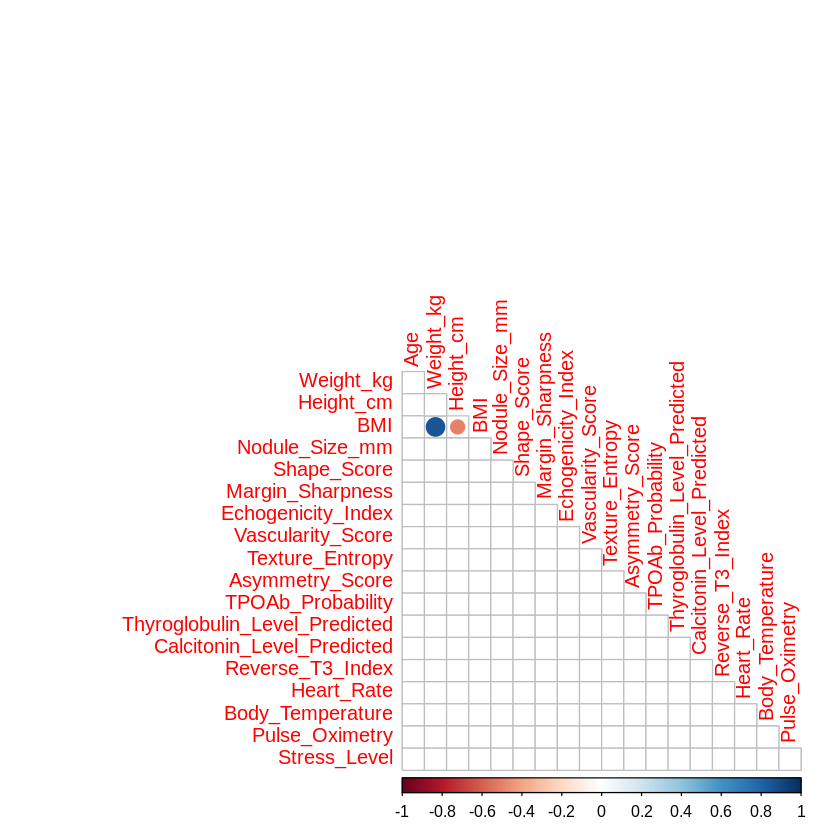

In [26]:
#Subset exclusivamente con las variables numéricas
corrdata<-data%>%
  select_if(is.numeric)
str(corrdata)

#Creación de la matriz de correlación
matrizcorr<-corrdata%>%
  cor(method="pearson")

matrizcorr

#Visualización de la matriz de p-valores

p_values <- matrizcorr %>% cor_pmat() %>% as.matrix()
p_values

#Visualización de la matriz de correlación

corrplot(matrizcorr,
    method="circle",
    type="lower",
    p.mat=p_values,
    sig.level=0.05,
    insig="blank",
    diag=FALSE)

#Resultados y conclusiones

##Modelo predictivo

In [ ]:
!pip install scikeras
!pip install scikit-learn==1.5.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 94.8 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1


In [ ]:
# Importe todos los packages necesarios
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, PowerTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, learning_curve, train_test_split, GridSearchCV
from sklearn.utils import shuffle
from sklearn.metrics import f1_score, classification_report
from sklearn.utils.class_weight import compute_class_weight

import tensorflow as tf

from keras import Input, Model
from keras import regularizers
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.optimizers import Adam
from scikeras.wrappers import KerasClassifier

from xgboost import XGBClassifier

from tqdm import tqdm

import joblib

En esta sección, exploraremos la posibilidad de predecir la recurrencia del cáncer de tiroides basándonos en las demás características que se incluyen en este conjunto de datos. Dado que la información de cada paciente se extrajo a través de múltiples visitas, emplear esta información temporal para incluir la evolución del estado de cada paciente a lo largo del tiempo sería quizá lo más informativo para nuestra predicción. Sin embargo, dado que se registraron diferentes cantidades de visitas para cada paciente, entre 2 y 5 visitas, tratar esta discrepancia requeriría técnicas que podrían ser demasiado complejas dentro del alcance de este proyecto. Por lo tanto, en adelante analizaremos las mediciones realizadas durante la última visita de cada paciente para predecir el riesgo de recurrencia, ya que este registro contiene la información más reciente sobre el estado del paciente.

Como no está claro de antemano qué tipo de modelo sería el más adecuado para esta tarea, implementaremos y compararemos algunos de los algoritmos de machine learning de vanguardia más populares para esta tarea concreta. Dado que nos enfrentamos a un problema de clasificación binaria (nuestra predicción será 'recurrencia' o 'no recurrencia'), trabajaremos con cuatro modelos diferentes que han demostrado funcionar muy bien en este contexto. Empezaremos con un modelo sencillo de regresión logística, seguido de un Random Forest y un modelo XGBoost más especializado y, por último, una red neuronal artificial. Sin embargo, antes de pasar a la aplicación real de estos modelos, es necesario tomar una serie de decisiones con respecto a la selección de características y el posterior preprocesamiento de los datos.

En lo que respecta a la selección de características, sólo queremos eliminar antes del análisis aquellas de las que podamos suponer con seguridad que tienen un valor predictivo escaso o nulo. Trabajamos con un conjunto de 37 predictores posibles, lo que sin duda no es una cantidad excesiva, especialmente en un contexto médico. Por lo tanto, decidimos excluir del análisis 'Patient_ID', 'Visit_Number', 'Visit_Timestamp', 'Scan_Type', 'Weight' y 'Height'. Es posible que el peso y la altura contengan algún tipo de valor predictivo para nuestra variable objetivo, pero ambas características ya están combinadas en la variable 'BMI'. Incluir las tres variables simultáneamente en nuestro modelo podría introducir el problema de la multicolinealidad para determinados modelos, dadas las elevadas correlaciones entre pares. En consecuencia, el modelo no podría distinguir cuál de las características correlacionadas es responsable de un cambio en el resultado, lo que daría lugar a estimaciones de coeficientes inestables, errores estándar más elevados y dificultades generales de interpretación.

Además, se podría argumentar que variables como 'Daily_Steps' o 'Sleep_Patterns' podrían no ser tampoco muy informativas dado nuestro objetivo. Sin embargo, como el valor predictivo de estas variables no está tan claro de antemano, decidimos incluirlas en el análisis por ahora. Como no estamos tratando con un número excesivo de variables, entrenar primero un modelo con el conjunto 'completo' de características no es un mal punto de partida. Después, los resultados obtenidos y los coeficientes del modelo podrían ayudarnos a eliminar características irrelevantes para recortar el modelo.

In [ ]:
# Leer los datos; sólo subo el archivo al almacenamiento de la sesión actual
df = pd.read_csv('ThyroTrack-MV.csv')

In [ ]:
# Ordenar por ID de paciente y número de visita para que la última visita sea la última
df_sorted = df.sort_values(by=['Patient_ID', 'Visit_Number'])

# Conservar la última visita por paciente
df_last_visits = df_sorted.groupby('Patient_ID', as_index=False).last()

In [ ]:
# Afirmar que sólo se incluyó un registro por paciente
print(df_last_visits['Patient_ID'].is_unique)

True


Un primer punto a considerar es si debemos incluir valores atípicos en la entrada de nuestro modelo. Dado que muchas de nuestras variables no son tan fáciles de interpretar o contienen mediciones muy específicas, puede que no sea óptimo eliminar sus valores atípicos correspondientes, ya que podrían haber sido mediciones reales e informativas. Sin embargo, una variable para la que podríamos eliminar valores atípicos 'ruidosos' de forma relativamente segura es el 'BMI'. Al inspeccionar manualmente los registros de pacientes asociados con algunos de los valores más bajos de IMC, vemos que contienen mediciones de peso poco realistas. Por lo tanto, decidimos incluir sólo a los pacientes con un IMC superior a 10 (que sigue siendo un límite inferior muy 'inclusivo'), eliminando 227 entradas de datos. Los valores atípicos en otras variables se incluyeron en el análisis posterior debido a las razones mencionadas anteriormente.

In [ ]:
# Eliminar los «valores atípicos» inferiores (valores poco realistas) del BMI -> elimina 227 entradas
df_last_visits = df_last_visits[df_last_visits['BMI'] > 10].reset_index(drop=True)

En términos de preprocesamiento, algunas variables aún necesitan ser codificadas o transformadas de antemano, dependiendo del algoritmo que se utilice. Por ejemplo, tanto el modelo de regresión logística como la red neuronal se benefician de la conversión de las características de entrada a una escala común, lo que también puede requerir que algunas distribuciones de variables se transformen antes de introducirlas en el modelo. Con este fin, dividimos nuestras características en cinco categorías, de modo que se pueda definir fácilmente un proceso de preprocesamiento distinto para cada tipo de variable.

Nuestra base de datos sólo contiene una variable realmente ordinal, que es 'Smoking_Status'. 'TSH_Risk_Level' también podría clasificarse técnicamente como ordinal, aunque dado nuestro objetivo de predecir la recurrencia del cáncer, esta podría ser una interpretación incorrecta. Dado que tanto los niveles 'low' como los 'high' de TSH se consideran poco saludables en comparación con los niveles «normal», es posible que ambos aumenten el riesgo de recurrencia del cáncer. Por lo tanto, no se puede definir un orden real de 'bueno' a 'malo' (o viceversa) para esta variable. En consecuencia, la definimos como una variable nominal, junto con 'Gender' y 'Cancer_Type'. Nuestra base de datos ya contiene una serie de variables binarias que no requieren ningún tratamiento previo. Se trata de 'Family_History', 'Radiation_Exposure', 'Calcification_Presence', 'Capsular_Invasion_Indicator', 'Medication_Adherence' and 'Diagnosis_Label'. Por último, en el caso de las variables numéricas, hay que distinguir entre variables asimétricas y no asimétricas. Para los modelos que se benefician de la normalidad, será necesario aplicar previamente una corrección a la distribución de las variables sesgadas. Comprobamos la normalidad de cada característica numérica inspeccionando sus respectivos histogramas y calculando la propia asimetría, utilizando el valor de corte común de (-)0,5 para distinguir entre ambas. Se supone que las variables con una puntuación de asimetría inferior a 0,5 tienen una distribución similar a la de Gauss, mientras que las que superan este umbral se someterán a una corrección de asimetría si el modelo lo requiere.

Ya observamos que para cada uno de los modelos siguientes, se aplica el mismo enfoque de codificación a las variables ordinales y nominales. Para la variable estrictamente ordinal 'Smoking_Status', se utiliza la codificación ordinal para convertir los valores [Non-Smoker, Former Smoker, Smoker] en números enteros [0, 1, 2]. Se trata de una ordenación de 'más sano' a 'menos sano' que debe tenerse en cuenta más adelante al interpretar los coeficientes del modelo. Las variables nominales se convierten a un formato numérico mediante la 'one-hot encoding'. Este tipo de codificación consiste en crear N nuevas variables binarias, siendo N el número de categorías diferentes de la variable original. Por ejemplo, si codificamos nuestra variable 'TSH_Risk_level' con los valores [low, normal, high], crearemos tres nuevas columnas binarias [TSH_Risk_Level_Low, TSH_Risk_Level_Normal, TSH_Risk_Level_High]. Un paciente con una puntuación 'high' de 'TSH_Risk_Level', tendría ahora un valor de 0 en las dos primeras columnas y un valor de 1 en la columna 'TSH_Risk_Level_High'. Para nuestro caso de uso, hacemos un ligero ajuste a este procedimiento estándar eliminando una de las categorías (elegimos eliminar la primera que se encuentra en cada variable nominal). Este ajuste es de vital importancia cuando se trabaja con un modelo de regresión logística. El motivo es que, al trabajar con N categorías nuevas, el valor de cada columna podría derivarse exactamente de las N-1 columnas restantes, lo que significa que habría una multicolinealidad perfecta en nuestro conjunto de datos. Como ya se ha mencionado, esto debe evitarse a toda costa para modelos como la regresión logística, ya que no sería capaz de estimar de forma única sus coeficientes en tal situación.

count    79773.00000
mean         0.04987
std          0.02004
min         -0.03800
25%          0.03600
50%          0.05000
75%          0.06300
max          0.14600
Name: Hormonal_Change_Rate, dtype: float64
-0.007642940377784116


<Axes: >

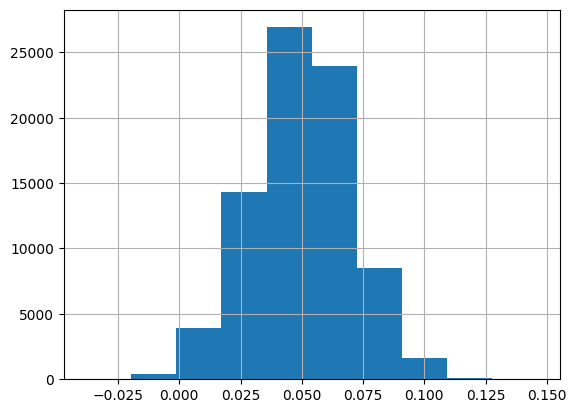

In [ ]:
# Inspeccionar las distribuciones de las diferentes características
print(df_last_visits['Hormonal_Change_Rate'].describe())
print(df_last_visits['Hormonal_Change_Rate'].skew())
df_last_visits['Hormonal_Change_Rate'].hist()

In [ ]:
# Definir distintos tipos de columnas
ordinal_cols = ['Smoking_Status']
nominal_cols = ['Gender', 'TSH_Risk_Level', 'Cancer_Type']
binary_cols = ['Family_History', 'Radiation_Exposure', 'Calcification_Presence', 'Capsular_Invasion_Indicator', 'Medication_Adherence',
               'Diagnosis_Label']
numeric_skewed_cols = ['Nodule_Size_mm', 'Shape_Score', 'Margin_Sharpness', 'TPOAb_Probability', 'Thyroglobulin_Level_Predicted',
                       'Calcitonin_Level_Predicted']
numeric_nonskewed_cols = ['Age', 'BMI', 'Echogenicity_Index', 'Vascularity_Score', 'Texture_Entropy', 'Asymmetry_Score',
                          'Reverse_T3_Index', 'Heart_Rate', 'Daily_Steps', 'Sleep_Patterns', 'Body_Temperature',
                          'Pulse_Oximetry', 'Stress_Level', 'Symptom_Onset_Duration', 'Hormonal_Change_Rate']

In [ ]:
# Definir el conjunto de características y la variable objetivo
X = df_last_visits[ordinal_cols + nominal_cols + binary_cols + numeric_skewed_cols + numeric_nonskewed_cols]
y = df_last_visits['Recurrence_Risk']

In [ ]:
# Ya definimos la misma división entrenamiento-prueba que se utilizará para cada uno de los cuatro modelos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Training set shape: (63818, 31)
Test set shape: (15955, 31)


In [ ]:
# Proporción de positivos en nuestra clase objetivo
frac_pos = np.sum(y_train == 1)/len(y_train)
print(frac_pos)

0.0999874643517503


In [ ]:
# Definir categorías ordenadas para la característica ordinal
ordinal_categories = [
    ['Non-Smoker', 'Former Smoker', 'Smoker'] # Smoker_Status
]

### 1. Regresión Logística ###

Empezaremos aplicando un modelo sencillo de regresión logística. Se trata de un tipo de modelo lineal generalizado utilizado para la clasificación binaria, que predice la probabilidad de que una entrada pertenezca a la clase «positiva» y = 1. En lugar de modelar el objetivo directamente, modela el logaritmo de las probabilidades (log-odds) como una función lineal de las características de entrada, así:

$$ ln{P(y=1∣x) \over 1-P(y=1∣x)} = β_0 + β_1x_1 + ... + β_px_p $$

Dada la sencillez de este tipo de modelo, junto con su tiempo de entrenamiento muy rápido y su alta interpretabilidad, se suele utilizar como modelo de referencia para tareas de clasificación binaria con el que después se pueden comparar modelos más especializados.

Sin embargo, hay que tener en cuenta ciertos supuestos. En primer lugar, la regresión logística supone que la probabilidad logarítmica del objetivo es una combinación lineal de las características, como muestra la fórmula anterior. Dado que el lado izquierdo de la ecuación contiene una transformación no lineal de la probabilidad de nuestro objetivo, las relaciones no lineales entre las características y la probabilidad del objetivo aún pueden capturarse. Sin embargo, una limitación de este tipo de modelo es que cualquier tipo de interacción entre características (o términos de orden superior de una única característica) no puede ser capturada por este modelo básico y necesita ser incluida explícitamente de antemano. Esto requiere conocimientos muy específicos del dominio, de los que no disponemos para nuestro caso de uso concreto. Además, los predictores no pueden estar perfectamente correlacionados entre sí. Como se ha explicado anteriormente, la inclusión de características muy correlacionadas entre sí podría dar lugar al problema de la multicolinealidad. Un simple análisis de correlación confirma que este no es el caso de ninguna de nuestras características. Por último, como este modelo utiliza la estimación por máxima verosimilitud (Maximum Likelihood Estimation) para estimar sus coeficientes, se requiere un tamaño de muestra suficientemente grande. Dado que trabajamos con 79773 entradas de datos, podemos suponer con seguridad que se cumple este requisito.

Otra ventaja de la regresión logística es que la regularización puede integrarse fácilmente mediante un término de penalización. La regularización es a menudo esencial cuando se entrenan modelos de machine learning para mitigar el sobreajuste (overfitting) del modelo en los datos de entrenamiento, mejorando así la generalización en datos no vistos. En la regresión logística, dicha regularización se incluye a menudo mediante un término de penalización en la función de pérdida. Esta penalización impide que los coeficientes del modelo crezcan demasiado, ya que entonces reaccionarían demasiado a los cambios en los valores de las características y posiblemente al ruido. Normalmente se consideran dos tipos de regularización: La regresión L1 (Lasso) o la regresión L2 (Ridge). Mientras que la regresión L2 empuja todos los coeficientes del modelo hacia cero, la regresión L1 puede llevar a que algunos de estos coeficientes se reduzcan exactamente a cero. Esto es especialmente interesante si se quiere reducir la cantidad de características incluidas en el modelo final (selección de características), ya que se están eliminando los predictores menos relevantes.

Por último, hay que tener en cuenta algunos preprocesamientos adicionales al emplear un modelo de Regresión Logística. En primer lugar, habrá que corregir las variables numéricas sesgadas. La ventaja de hacer esto es doble. Por un lado, si el efecto de una característica sobre el logaritmo de las probabilidades crece de forma no lineal en la realidad, una simple transformación puede hacer que esa relación sea más lineal, mejorando el ajuste del modelo. Por otro lado, se puede mitigar la influencia de los valores atípicos, ya que las características muy sesgadas suelen tener una cola larga y valores atípicos extremos. Esto es especialmente interesante en nuestro caso, ya que apenas eliminamos los valores atípicos de antemano. Para corregir la asimetría, aplicamos el método de Yeo-Johnson, ya que es capaz de tratar por igual la asimetría izquierda y derecha.

En segundo lugar, tenemos que convertir nuestras características a una escala común. Como la regresión logística se ajusta normalmente mediante un solucionador basado en gradientes, las características con rangos de valores muy diferentes harían que el optimizador manejara magnitudes de gradiente muy diferentes con respecto a cada característica. Por lo tanto, al poner cada característica en una escala común, los gradientes son de magnitud comparable, lo que resulta en una convergencia más rápida durante el proceso de entrenamiento. Además, cuando se trabaja con una penalización de regularización (tanto L1 como L2), una diferencia de escala entre las características provocaría que la regularización no se aplicara por igual a las distintas características, ya que los coeficientes de las características con un rango grande se reducirían más que los de las características con un rango más pequeño. Para mitigar estos dos problemas, aplicamos la escala estándar a nuestros rasgos ordinales y numéricos, convirtiéndolos en una distribución con una media igual a 0 y una varianza igual a 1. Las características nominales y binarias se dejan intactas, lo que significa que en realidad estarán en una escala ligeramente diferente (ya que son iguales a 0 o 1). Aunque se les puede aplicar una escala estándar, en la práctica no se suele hacer, ya que se expresan en una escala muy similar. Lo único importante que hay que recordar es que, tras la entrenemaniento, cada característica debe interpretarse en su propia 'unidad natural'.

In [ ]:
# Ordinal pipeline -> OrdinalEncoder + StandardScaler
lr_ordinal_pipeline = Pipeline([
    ('ordinal_enc', OrdinalEncoder(categories=ordinal_categories)),
    ('scaler', StandardScaler())
])

# Nominal pipeline -> OneHotEncoder
lr_nominal_pipeline = Pipeline([
    ('nominal_enc', OneHotEncoder(drop='first', handle_unknown='ignore'))
])

# Numeric skewed pipeline -> PowerTransformer + StandardScaler
# La estandarización está establecida en False, ya que esta se realiza posteriormente mediante el StandardScaler.
lr_skewed_pipeline = Pipeline([
    ('power', PowerTransformer(method='yeo-johnson', standardize=False)),
    ('scale', StandardScaler())
])

# Numeric non-skewed pipeline -> StandardScaler
lr_nonskewed_pipeline = Pipeline([
    ('scale', StandardScaler())
])

In [ ]:
# Definir el preprocesador para todas las columnas a la vez -> no se necesita preprocesamiento para las columnas binarias.

lr_preprocessor = ColumnTransformer(transformers=[
    ('ordinal', lr_ordinal_pipeline, ordinal_cols),
    ('nominal', lr_nominal_pipeline, nominal_cols),
    ('binary', 'passthrough', binary_cols),
    ('skewed', lr_skewed_pipeline, numeric_skewed_cols),
    ('non-skewed', lr_nonskewed_pipeline, numeric_nonskewed_cols)
])

<Figure size 1500x1000 with 0 Axes>

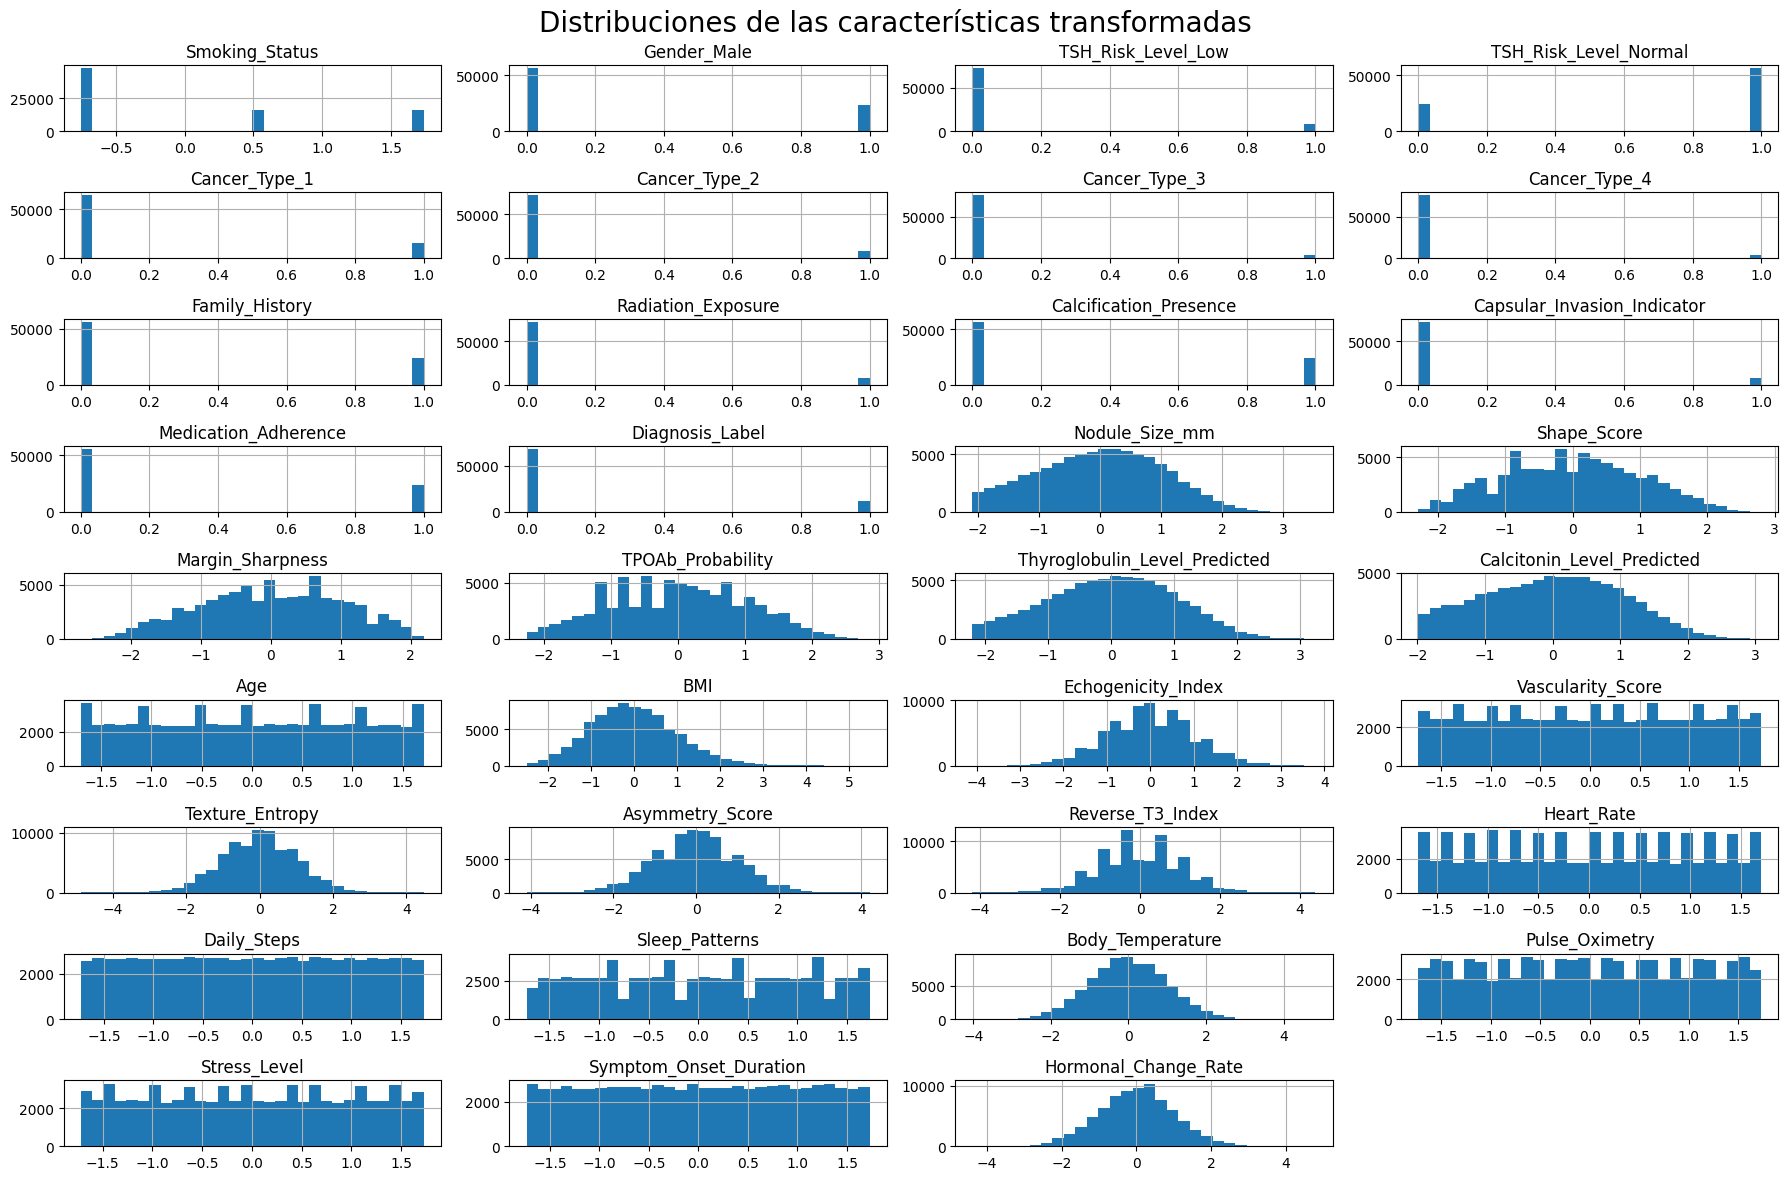

In [ ]:
# Para inspeccionar cómo se transformaron las distribuciones después de corregir la asimetría y estandarizar
# Claramente, las distribuciones que antes estaban fuertemente sesgadas ahora tienen una distribución más parecida a la Gaussiana.

# Ajustar el preprocesador a los datos
lr_preprocessor.fit(X)

# Transformar el conjunto de datos
X_transformed = lr_preprocessor.transform(X)

# Obtener los nombres de las características para las columnas codificadas con OneHotEncoder
ohe = lr_preprocessor.named_transformers_['nominal']
ohe_features = ohe.get_feature_names_out(nominal_cols)

all_feature_names = (
    ordinal_cols +
    list(ohe_features) +
    binary_cols +
    numeric_skewed_cols +
    numeric_nonskewed_cols
)

df_transformed = pd.DataFrame(X_transformed, columns=all_feature_names)

# Visualizar

plt.figure(figsize=(15, 10))
df_transformed.hist(bins=30, figsize=(18, 12), layout=(int(np.ceil(len(df_transformed.columns)/4)), 4))
plt.suptitle("Distribuciones de las características transformadas", fontsize=20)
plt.tight_layout()
plt.show()

Antes de entrenar nuestro modelo final con el conjunto completo de entrenamiento, primero realizamos una búsqueda en cuadrícula (Grid Search) con validación cruzada (cross-validation) para ajustar finamente nuestros hiperparámetros. Como cada tipo de modelo de machine learning tiene una variedad de hiperparámetros, cada uno con varios valores posibles, existe un gran número de modelos candidatos, cada uno correspondiente a una combinación distinta de valores de hiperparámetros. La idea es encontrar la configuración óptima para nuestros hiperparámetros antes de proceder al entrenamiento del modelo final.

Por razones prácticas, no realizaremos una búsqueda exhaustiva de todos los hiperparámetros y sus valores posibles, ya que la cantidad de modelos a probar crece rápidamente en este tipo de búsqueda, debido a que se prueban todas las combinaciones posibles. Además, el valor óptimo (o al menos adecuado) para ciertos hiperparámetros puede ser razonado previamente, sin necesidad de entrenar realmente el modelo.

Por ejemplo, configuramos nuestro solver como 'liblinear', ya que se sabe que funciona bien para conjuntos de datos relativamente pequeños como el nuestro. También establecemos los pesos de clase ('class_weights') como 'balanced' para contrarrestar el desequilibrio presente en nuestra variable objetivo. De hecho, solo aproximadamente el 10% de los pacientes pertenecen a la clase positiva (recurrencia). Si no imponemos pesos de clase, nuestro modelo podría aprender a predecir siempre '0' y aún así obtener un buen puntaje, ya que acertaría en el 90% de los casos. Para que el modelo sea más sensible a la clase minoritaria, imponemos que los errores en esta clase se penalicen más, introduciendo pesos de clase balanceados, que son inversamente proporcionales a la frecuencia de la clase en la variable objetivo.

Los hiperparámetros que ajustamos son el tipo de penalización de la regresión y el inverso de la fuerza de regularización C (por lo que un valor más bajo de C corresponde a una regularización más fuerte, lo que impulsa al modelo hacia la simplicidad). Como probamos dos tipos diferentes de regularización (L1 o L2) y cuatro valores distintos para la fuerza de regularización (0.01, 0.1, 1 y 10), exploraremos ocho combinaciones diferentes de valores de hiperparámetros.

La mejor combinación de hiperparámetros será aquella para la cual el modelo generalice mejor a datos nuevos que no fueron vistos durante el entrenamiento, que es típicamente el objetivo de los modelos de machine learning en aplicaciones reales. Para estimar esto de manera robusta, aplicamos una validación cruzada de 5 pliegues (5-fold cross-validation).

Primero, el conjunto de entrenamiento se divide en cinco partes iguales. Se entrena un primer modelo con cuatro de esas partes, mientras que la quinta se usa como conjunto de validación para evaluar el desempeño del modelo en datos no vistos. Luego, se entrena un segundo modelo (con la misma configuración de hiperparámetros que el anterior), esta vez usando un pliegue diferente como conjunto de validación. Este procedimiento se repite cinco veces, de modo que cada pliegue se usa una vez para validación.

Después de probar cada combinación de hiperparámetros con validación cruzada, se selecciona el mejor modelo como aquel que obtuvo el puntaje promedio más alto en los cinco pliegues. Al hacer esto, se obtiene una estimación más fiable y robusta de la capacidad de generalización, ya que la posible varianza en los resultados se reduce al promediar múltiples entrenamientos. Además, al usar cada parte del conjunto de entrenamiento una vez para validación, se minimiza el riesgo de sobreajuste a una parte específica de los datos. Finalmente, al usar un procedimiento de validación cruzada estratificada, nos aseguramos de que cada pliegue contenga la misma distribución de clases positivas y negativas que se encuentra en todo el conjunto de entrenamiento.

La desventaja de este tipo de procedimiento es un aumento en el tiempo de entrenamiento. En nuestro ejemplo, estamos probando 8 combinaciones diferentes de hiperparámetros, donde cada combinación se prueba 5 veces, resultando en un total de 40 modelos diferentes para ajustar. Esto sigue siendo un número muy bajo de modelos, y, junto con la rápida velocidad de entrenamiento de los modelos de regresión logística, esta búsqueda en cuadrícula todavía debería tomar menos de un minuto.

Otra pregunta importante es qué métrica de evaluación usar durante el entrenamiento. La métrica predeterminada es la precisión (accuracy), que simplemente mide la proporción de etiquetas correctamente predichas. Sin embargo, debido al extremo desequilibrio de clases presente en nuestra variable objetivo, esta métrica no es adecuada.

Si el modelo se evaluara solo con la precisión, podría aprender a predecir siempre 0 (no recurrencia) y aún así obtener un puntaje de aproximadamente 90%, que es bastante alto. Sin embargo, en nuestro conjunto de datos, nos interesa más predecir correctamente la clase minoritaria.

De hecho, clasificar erróneamente a un paciente cuyo cáncer eventualmente recurrirá sería un error muy 'costoso', ya que podría retrasar intervenciones médicas necesarias y provocar la muerte de un paciente que potencialmente podría haberse salvado. Por otro lado, predecir erróneamente recurrencia en un paciente 'sano' tampoco debe tomarse a la ligera, pues podría generar pruebas innecesarias o sobretratamiento, además de ansiedad para el paciente.

Estos dos aspectos se reflejan en las métricas de precision (esto no es lo mismo que la precisión o accuracy) y recall(sensibilidad). La precision indica la proporción de casos positivos correctamente predichos; aplicado a nuestro problema: “De todos los pacientes que el modelo indicó que 'recurrirán', ¿qué fracción realmente recurre?”.

La recall o sensibilidad, por su parte, mide la proporción de casos positivos reales que el modelo detecta correctamente, es decir: “De todos los pacientes que realmente recurren, ¿qué porcentaje detecta el modelo?”.

En el contexto médico, suele priorizarse una alta sensibilidad para identificar la mayor cantidad posible de pacientes en riesgo. Por eso, usaremos el recall como métrica principal para evaluar el modelo durante el entrenamiento.

No obstante, al evaluar nuestros modelos también consideraremos la precision y el F1-score, una métrica que combina ambas calculando su 'media armónica', y que se utiliza frecuentemente en la práctica:
$$F1 = 2{precision * recall \over precision + recall}$$

In [ ]:
# Pipeline entero
lr_pipeline = Pipeline([
    ('lr_preprocessor', lr_preprocessor),
    ('lr_classifier', LogisticRegression(
        solver='liblinear',
        class_weight='balanced',
        random_state=42
    ))
])

In [ ]:
# cuadrícula de hiperparámetros
lr_param_grid = {
    'lr_classifier__penalty': ['l1', 'l2'],
    'lr_classifier__C': [0.01, 0.1, 1, 10]
}

In [ ]:
# StratifiedKFold y GridSearchCV
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

lr_grid_search = GridSearchCV(
    lr_pipeline,
    param_grid=lr_param_grid,
    scoring='recall',
    cv=skf,
    n_jobs=-1,
    verbose=2
)

In [ ]:
# Ajustando la cuadrícula
with tqdm(total=1, desc="Training GridSearchCV") as pbar:
    lr_grid_search.fit(X_train, y_train)
    pbar.update(1)

Training GridSearchCV:   0%|          | 0/1 [00:00<?, ?it/s]

Fitting 5 folds for each of 8 candidates, totalling 40 fits


Training GridSearchCV: 100%|██████████| 1/1 [00:34<00:00, 34.16s/it]


In [ ]:
# Resultados
print("Mejores hiperparámetros:", lr_grid_search.best_params_)
print(f"Mejor puntuación de recall en la validación cruzada (CV): {lr_grid_search.best_score_:.4f}")

Mejores hiperparámetros: {'lr_classifier__C': 0.01, 'lr_classifier__penalty': 'l1'}
Mejor puntuación de recall en la validación cruzada (CV): 0.5034


In [ ]:
# Evaluación en el conjunto de prueba
lr_best_model = lr_grid_search.best_estimator_
y_pred = lr_best_model.predict(X_test)
print("\nInforme de clasificación en el conjunto de prueba.:")
print(classification_report(y_test, y_pred, digits=4))


Informe de clasificación en el conjunto de prueba.:
              precision    recall  f1-score   support

           0     0.9011    0.5017    0.6445     14379
           1     0.0986    0.4975    0.1646      1576

    accuracy                         0.5013     15955
   macro avg     0.4999    0.4996    0.4046     15955
weighted avg     0.8218    0.5013    0.5971     15955



Encontramos que nuestro modelo de regresión logística funciona mejor cuando se impone una constante de regularización fuerte de 0.01 y se usa la regularización L1. Sin embargo, los puntajes obtenidos no son exactamente buenos. En los datos de prueba no vistos, obtenemos un recall para la clase positiva del 49.75%, lo que significa que solo aproximadamente la mitad de las recurrencias totales son identificadas por nuestro modelo.

Además, obtenemos un puntaje de precision extremadamente bajo para la clase positiva, del 9.86%, lo que indica que cada vez que nuestro modelo predice que el cáncer de un paciente recurrirá, se equivoca en más del 90% de los casos. El hecho de que la precision obtenida sea mucho menor que el recall no es sorprendente, ya que usamos el recall como métrica principal durante el entrenamiento, y un aumento en el recall casi siempre implica una caída en la precision.

Ahora que hemos determinado de manera robusta el conjunto óptimo de hiperparámetros, podemos proceder a entrenar nuestro modelo final usando todo el conjunto de entrenamiento.

In [ ]:
# Ajustar la canalización con el conjunto completo de entrenamiento utilizando los hiperparámetros óptimos

lr_full_model = lr_pipeline.fit(X_train, y_train)

In [ ]:
# Inspeccionar las métricas de evaluación en el conjunto de prueba

y_pred_test = lr_full_model.predict(X_test)
print("=== Evaluación final en el conjunto de prueba ===")
print(classification_report(y_test, y_pred_test, digits=4))

=== Evaluación final en el conjunto de prueba ===
              precision    recall  f1-score   support

           0     0.9005    0.5098    0.6511     14379
           1     0.0980    0.4860    0.1632      1576

    accuracy                         0.5075     15955
   macro avg     0.4993    0.4979    0.4071     15955
weighted avg     0.8212    0.5075    0.6029     15955



Las métricas obtenidas para nuestro modelo final son muy similares a las anteriores. Esto es esperado, ya que el conjunto completo de entrenamiento no difiere mucho de las combinaciones de pliegues usadas durante la validación cruzada.

Los resultados obtenidos son bastante decepcionantes, pero esto podría deberse a que un modelo de regresión logística no es el más adecuado para nuestro conjunto de datos. Quizás sea una indicación de que no existe una relación lineal entre el logaritmo de las probabilidades de nuestra variable objetivo y los predictores.

Por lo tanto, pasaremos a un tipo de modelo diferente. Pero antes de hacerlo, podría valer la pena inspeccionar los coeficientes de nuestro modelo para identificar qué características son las más informativas para predecir la recurrencia del cáncer al usar Regresión Logística.

In [ ]:
# Para inspeccionar los coeficientes del modelo final con fines de interpretación

# Extraer el modelo regresión logística entrenado desde la canalización
logreg_model = lr_pipeline.named_steps["lr_classifier"]

# Obtener los nombres de las características después del preprocesamiento
feature_names = lr_pipeline.named_steps["lr_preprocessor"].get_feature_names_out()

# Obtener los coeficientes
coefficients = logreg_model.coef_[0]

# Combinar en un DataFrame

coef_df = pd.DataFrame({
    "Característica": feature_names,
    "Coeficiente": coefficients
}).sort_values(by="Coeficiente", ascending=False)

print(coef_df)

                           Característica  Coeficiente
9              binary__Radiation_Exposure     0.060841
13                binary__Diagnosis_Label     0.046710
12           binary__Medication_Adherence     0.030077
6                  nominal__Cancer_Type_3     0.020992
1                    nominal__Gender_Male     0.020589
8                  binary__Family_History     0.018837
16               skewed__Margin_Sharpness     0.018323
34       non-skewed__Hormonal_Change_Rate     0.017557
15                    skewed__Shape_Score     0.015049
14                 skewed__Nodule_Size_mm     0.014636
29             non-skewed__Sleep_Patterns     0.012562
27                 non-skewed__Heart_Rate     0.011092
31             non-skewed__Pulse_Oximetry     0.011048
28                non-skewed__Daily_Steps     0.010058
0                 ordinal__Smoking_Status     0.005680
23          non-skewed__Vascularity_Score     0.004440
20                        non-skewed__Age     0.003079
21        

Al inspeccionar los coeficientes del modelo, obtenemos una indicación de por qué no logramos puntajes muy buenos (en la clase positiva). Ninguno de los coeficientes de las características tiene un valor particularmente alto, lo que significa que nuestras distintas variables no son muy informativas para predecir la recurrencia del cáncer.

Sin embargo, se pueden hacer interpretaciones interesantes. Por ejemplo, la exposición previa a radiación parece ser el mayor factor que contribuye a la probabilidad de recurrencia. Su coeficiente debe interpretarse de la siguiente manera: el logaritmo de las probabilidades de recurrencia del cáncer aumenta en 0.060841 para pacientes que fueron expuestos a radiación en comparación con aquellos que no lo fueron.

Una interpretación más intuitiva (en términos de probabilidades en lugar de log-odds) se obtiene exponenciando el coeficiente, es decir: Las probabilidades de recurrencia son e^0.060841 = 1.0627 veces mayores para pacientes que han estado expuestos a radiación previamente.

No sorprende que los pacientes con diagnóstico maligno también tengan una mayor probabilidad de recurrencia que aquellos con un tumor benigno.

Para variables que fueron escaladas, como 'Nodule_Size_mm', la interpretación es la siguiente: por cada incremento unitario en esta variable escalada, que mide el tamaño del tumor, las probabilidades de recurrencia son e^0.014636 = 1.0147 veces mayores.

Para coeficientes negativos, encontramos, por ejemplo, que para pacientes con tipo de cáncer 2, las probabilidades de recurrencia son e^(-0.068603) = 0.9337 veces las probabilidades de pacientes con tipo de cáncer 0, que es la clase de referencia que se dejó fuera tras la codificación one-hot de esta variable nominal (para evitar multicolinealidad), y por tanto tiene un coeficiente implícito de 0.

Estas probabilidades para el tipo 2 también se pueden comparar con otros tipos que no sean la clase de referencia. Por ejemplo, las probabilidades de recurrencia para el tipo de cáncer 3 son e^(0.020992 - (-0.068603)) = 1.0937 veces mayores que las del tipo 2.

### 2. Random Forest ###

Ahora pasamos a un segundo tipo de modelo, conocido como Random Forest (Bosque Aleatorio). Es un método de aprendizaje en conjunto (ensemble learning) que funciona construyendo una multitud de árboles de decisión (decision trees) durante el entrenamiento, y puede usarse tanto para regresión como para clasificación.

Al estar compuesto por árboles de decisión, es un modelo no paramétrico que aprende reglas de decisión basadas en los datos. El proceso de entrenamiento de un Random Forest es el siguiente: primero, se crean múltiples conjuntos de datos más pequeños mediante muestreo con reemplazo (para asegurar la independencia entre muestras) a partir del conjunto original. En el mundo del machine learning, este proceso se llama 'bootstrap aggregating' o 'bagging'.

Luego, se construye un árbol de decisión para cada una de estas muestras. En cada división (split) dentro de un árbol, se selecciona un subconjunto aleatorio de características, y la mejor división (la que reduce la impureza más) se elige solo entre estas, para fomentar la diversidad entre los árboles. Así, se mejora la generalización y se reduce el sobreajuste.

Finalmente, cuando se usa para clasificación, se registra el voto de cada árbol individual, y la salida final del modelo se determina por mayoría de votos.

A diferencia de la regresión logística, un modelo de Random Forest no hace suposiciones de linealidad, y puede modelar interacciones no lineales u otras relaciones complejas entre las características de forma natural. Además, funciona bien con tipos de variables mixtas y es invariante a la escala y robusto frente a valores atípicos. Por lo tanto, a diferencia de la regresión logística, no requiere escalado ni corrección de asimetría.

Por otro lado, una desventaja del Random Forest comparado con la regresión logística es que es menos interpretable y posiblemente más lento y que consume más memoria debido a su tamaño de modelo más grande.

In [ ]:
# Ordinal pipeline -> OrdinalEncoder
rf_ordinal_pipeline = Pipeline([
    ('ordinal_enc', OrdinalEncoder(categories=ordinal_categories))
])

# Nominal pipeline -> OneHotEncoder
rf_nominal_pipeline = Pipeline([
    ('nominal_enc', OneHotEncoder(drop='first', handle_unknown='ignore'))
])

In [ ]:
# Definir el preprocesador para todas las columnas a la vez -> no se necesita preprocesamiento para las columnas binarias

rf_preprocessor = ColumnTransformer(transformers=[
    ('ordinal', rf_ordinal_pipeline, ordinal_cols),
    ('nominal', rf_nominal_pipeline, nominal_cols),
    ('binary', 'passthrough', binary_cols),
    ('skewed', 'passthrough', numeric_skewed_cols),
    ('non-skewed', 'passthrough', numeric_nonskewed_cols)
])

In [ ]:
# Calcular pesos personalizados
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
custom_weights = {0: class_weights[0], 1: class_weights[1] * 1.1}  # Exagerar el peso de la clase minoritaria

In [ ]:
# Pipeline para el modelo Random Forest

rf_pipeline = Pipeline([
    ('rf_preprocessor', rf_preprocessor),
    ('rf_classifier', RandomForestClassifier(
        class_weight=custom_weights,
        max_features='sqrt',
        random_state=42
    ))
])

In [ ]:
# Cuadrícula de hiperparámetros para ajuste (tuning)
rf_param_grid = {
    'rf_classifier__n_estimators': [100, 200, 300],
    'rf_classifier__max_depth': [None, 10, 20, 30],
    'rf_classifier__min_samples_split': [2, 5, 10],
    'rf_classifier__min_samples_leaf': [1, 2, 4]
}

De manera similar a antes, realizamos una búsqueda en cuadrícula (grid search) para encontrar la combinación óptima de configuraciones de hiperparámetros.

* n_estimators controla el número de árboles en el bosque, y por lo tanto la cantidad de conjuntos de datos más pequeños que se muestrean del conjunto completo.

* max_depth determina qué tan "profundo" puede crecer un árbol, donde 'None' permite un crecimiento completo hasta que una 'hoja' (leaf) sea pura (si una hoja no es pura, se vota por la clase mayoritaria).

* min_samples_split establece el número mínimo de observaciones necesarias para dividir un 'nodo' (node), controlando así también la profundidad de los árboles.

* min_samples_leaf determina el número mínimo de observaciones requeridas en una hoja, y puede ajustarse para controlar el sobreajuste.

Tras algunas pruebas iniciales, notamos que este tipo de modelo tiene más dificultades para predecir correctamente la clase minoritaria cuando se usan simplemente pesos balanceados para las clases, resultando en puntuaciones muy pobres de precision y recall para esta clase. Como nuestro interés principal es obtener buenos resultados en la predicción de la clase minoritaria, decidimos usar pesos personalizados.

Después de experimentar con varios valores, encontramos que asignar una importancia a la clase positiva de 1,1 veces la de la clase negativa (después de imponer pesos balanceados) dio resultados razonables, en línea con los obtenidos por nuestro modelo de regresión logística. Aumentar aún más este peso mejoró el desempeño en la clase minoritaria, pero a un gran costo en las predicciones de la clase mayoritaria. Al fin y al cabo, un modelo con un recall muy alto para la clase 'recurrencia' que predice esta clase casi siempre, no tiene mucho valor.

Ahora que tenemos 108 combinaciones candidatas de hiperparámetros para probar con validación cruzada de 5 pliegues, se deben entrenar un total de 540 modelos. Por tanto, el tiempo de entrenamiento será mucho más largo que para la regresión logística, ya que el Random Forest es naturalmente más lento y complejo. Mientras que la búsqueda para el primer modelo tomó solo medio minuto, optimizar el Random Forest requirió un total de 80 minutos. Sin embargo, en el mundo del machine learning, este sigue siendo un tiempo de entrenamiento relativamente corto.

In [ ]:
# StratifiedKFold + GridSearch
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

rf_grid_search = GridSearchCV(
    rf_pipeline,
    param_grid=rf_param_grid,
    scoring='recall',
    cv=cv,
    verbose=1,
    n_jobs=-1,
    return_train_score=True
)

In [ ]:
# Fase de entranamiento
# !! Ten cuidado, ejecutar este fragmento de código lleva al menos 1,5 horas (probablemente mucho más cuando se ejecuta en Colab)!
with tqdm(total=1, desc="Training GridSearchCV") as pbar:
    rf_grid_search.fit(X_train, y_train)
    pbar.update(1)

In [ ]:
# -> Puedes simplemente ejecutar este fragmento de código para cargar el mejor modelo que obtuve después de la búsqueda en cuadrícula
rf_grid_search = joblib.load("rf_gridsearch_results.pkl")

In [ ]:
# Mejores parámetros
rf_best_params = rf_grid_search.best_params_
print("Mejores hiperparámetros")
print(rf_best_params)
print(f"\nMejor puntuación de recall en la validación cruzada (CV): {rf_grid_search.best_score_:.4f}")

Mejores hiperparámetros
{'rf_classifier__max_depth': 10, 'rf_classifier__min_samples_leaf': 4, 'rf_classifier__min_samples_split': 2, 'rf_classifier__n_estimators': 100}

Mejor puntuación de recall en la validación cruzada (CV): 0.4303


In [ ]:
# Evaluación final en el conjunto de prueba reservado con los mejores parámetros
y_pred = rf_grid_search.predict(X_test)
print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_pred, digits=4))


Classification Report (Test Set):
              precision    recall  f1-score   support

           0     0.8996    0.4961    0.6395     14379
           1     0.0972    0.4949    0.1625      1576

    accuracy                         0.4960     15955
   macro avg     0.4984    0.4955    0.4010     15955
weighted avg     0.8203    0.4960    0.5924     15955



Encontramos que nuestro modelo de Random Forest obtiene su mejor rendimiento cuando se utilizan los valores más bajos para los hiperparámetros que controlan el número de árboles y su profundidad, lo que indica una complejidad relativamente baja en nuestro conjunto de datos. Por otro lado, el número mínimo de observaciones requerido en una hoja está establecido en el valor más alto, lo que indica que se prestó considerable atención a evitar el sobreajuste.

Utilizando esta combinación de valores de hiperparámetros, obtenemos un rendimiento ligeramente mejor en términos de recall para la clase positiva, en comparación con el modelo de regresión logística. Sin embargo, esto se logra a costa de una peores puntuaciones de precision y recall para las demás categorías. Por lo tanto, no podemos concluir que este tipo de modelo tenga un mejor desempeño que el anterior. De hecho, quizás de forma sorprendente, el modelo de Random Forest obtiene puntuaciones F1 ligeramente peores que el modelo de regresión logística.

In [ ]:
# Ahora entrenando un modelo final de Random Forest con todo el conjunto de datos de entrenamiento
rf_final_model = Pipeline(steps=[
    ('rf_preprocessor', rf_preprocessor),
    ('rf_classifier_final', RandomForestClassifier(class_weight=custom_weights, random_state=42))
])

rf_final_model.set_params(rf_classifier_final__max_depth=10, rf_classifier_final__min_samples_leaf=4,
                          rf_classifier_final__min_samples_split=2, rf_classifier_final__n_estimators=100)

Pipeline(steps=[('rf_preprocessor',
                 ColumnTransformer(transformers=[('ordinal',
                                                  Pipeline(steps=[('ordinal_enc',
                                                                   OrdinalEncoder(categories=[['Non-Smoker',
                                                                                               'Former '
                                                                                               'Smoker',
                                                                                               'Smoker']]))]),
                                                  ['Smoking_Status']),
                                                 ('nominal',
                                                  Pipeline(steps=[('nominal_enc',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['Gender', 'TSH_Risk_Level',
                                                   'Cancer_Type']),
                                                 ('binary...
                                                   'Asymmetry_Score',
                                                   'Reverse_T3_Index',
                                                   'Heart_Rate', 'Daily_Steps',
                                                   'Sleep_Patterns',
                                                   'Body_Temperature',
                                                   'Pulse_Oximetry',
                                                   'Stress_Level',
                                                   'Symptom_Onset_Duration',
                                                   'Hormonal_Change_Rate'])])),
                ('rf_classifier_final',
                 RandomForestClassifier(class_weight={0: np.float64(0.5555478176088584),
                                                      1: np.float64(5.500689547092932)},
                                        max_depth=10, min_samples_leaf=4,
                                        random_state=42))])

In [ ]:
# Ajustar (fit) con todos los datos de entrenamiento
rf_final_model.fit(X_train, y_train)

Pipeline(steps=[('rf_preprocessor',
                 ColumnTransformer(transformers=[('ordinal',
                                                  Pipeline(steps=[('ordinal_enc',
                                                                   OrdinalEncoder(categories=[['Non-Smoker',
                                                                                               'Former '
                                                                                               'Smoker',
                                                                                               'Smoker']]))]),
                                                  ['Smoking_Status']),
                                                 ('nominal',
                                                  Pipeline(steps=[('nominal_enc',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['Gender', 'TSH_Risk_Level',
                                                   'Cancer_Type']),
                                                 ('binary...
                                                   'Asymmetry_Score',
                                                   'Reverse_T3_Index',
                                                   'Heart_Rate', 'Daily_Steps',
                                                   'Sleep_Patterns',
                                                   'Body_Temperature',
                                                   'Pulse_Oximetry',
                                                   'Stress_Level',
                                                   'Symptom_Onset_Duration',
                                                   'Hormonal_Change_Rate'])])),
                ('rf_classifier_final',
                 RandomForestClassifier(class_weight={0: np.float64(0.5555478176088584),
                                                      1: np.float64(5.500689547092932)},
                                        max_depth=10, min_samples_leaf=4,
                                        random_state=42))])

Al igual que con el modelo de regresión logística, ahora entrenamos un modelo final utilizando todo el conjunto de datos de entrenamiento con los hiperparámetros óptimos. Una vez más, obtenemos exactamente los mismos resultados al entrenar con el conjunto completo de datos que durante la validación cruzada.

In [ ]:
# Evaluación final en el conjunto de prueba reservado
y_pred = rf_final_model.predict(X_test)

print("\nInforme de clasificación en el conjunto de prueba:")
print(classification_report(y_test, y_pred, digits=4))


Informe de clasificación en el conjunto de prueba:
              precision    recall  f1-score   support

           0     0.8996    0.4961    0.6395     14379
           1     0.0972    0.4949    0.1625      1576

    accuracy                         0.4960     15955
   macro avg     0.4984    0.4955    0.4010     15955
weighted avg     0.8203    0.4960    0.5924     15955



In [ ]:
# Imprimir la importancia de las características
rf_final_model.named_steps['rf_classifier_final'].feature_importances_

array([0.01003567, 0.00402711, 0.00263851, 0.00528335, 0.0050346 ,
       0.0038392 , 0.00212119, 0.00193576, 0.00413977, 0.00272345,
       0.00482438, 0.00351993, 0.00385162, 0.00471122, 0.05200862,
       0.04796975, 0.04154517, 0.03962993, 0.05109941, 0.05382011,
       0.04047797, 0.05278129, 0.04303571, 0.04179132, 0.04097732,
       0.0437745 , 0.02980195, 0.03704942, 0.05570647, 0.03716482,
       0.04892571, 0.03944833, 0.04337384, 0.05009552, 0.05083708])

                          Feature  Importance
0                     Daily_Steps    0.055706
1      Calcitonin_Level_Predicted    0.053820
2                             BMI    0.052781
3                  Nodule_Size_mm    0.052009
4   Thyroglobulin_Level_Predicted    0.051099
5            Hormonal_Change_Rate    0.050837
6          Symptom_Onset_Duration    0.050096
7                Body_Temperature    0.048926
8                     Shape_Score    0.047970
9                 Asymmetry_Score    0.043774
10                   Stress_Level    0.043374
11             Echogenicity_Index    0.043036
12              Vascularity_Score    0.041791
13               Margin_Sharpness    0.041545
14                Texture_Entropy    0.040977
15                            Age    0.040478
16              TPOAb_Probability    0.039630
17                 Pulse_Oximetry    0.039448
18                 Sleep_Patterns    0.037165
19                     Heart_Rate    0.037049
20               Reverse_T3_Index 

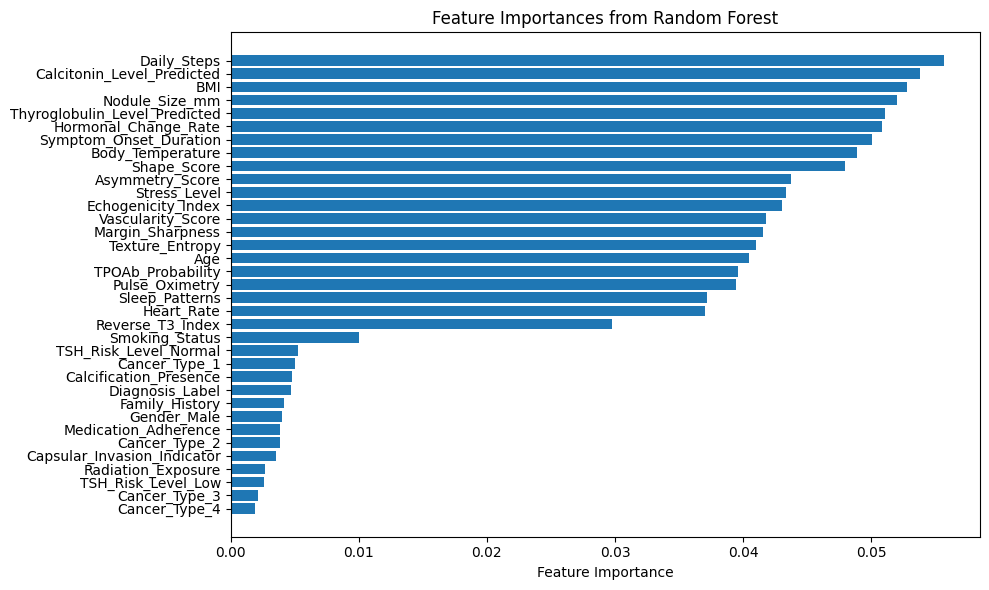

In [ ]:
# Recuperar los nombres originales de las características para asignarlos correctamente a su importancia correspondiente

# Obtener el preprocesador y el clasificador ajustados
rf_fitted_preprocessor = rf_final_model.named_steps['rf_preprocessor']
rf_fitted_classifier = rf_final_model.named_steps['rf_classifier_final']

# Obtener los nombres de las características desde el preprocesador
def get_feature_names(preprocessor):
    feature_names = []

    for name, transformer, cols in preprocessor.transformers_:
        if name == 'nominal':
            # OneHotEncoder
            ohe = transformer.named_steps['nominal_enc']
            ohe_features = ohe.get_feature_names_out(cols)
            feature_names.extend(ohe_features)
        elif name == 'ordinal':
            feature_names.extend(cols)
        elif name == 'binary':
            feature_names.extend(cols)
        elif name == 'non-skewed':
            feature_names.extend(cols)
        elif name == 'skewed':
            feature_names.extend(cols)

    return feature_names

# Obtener los nombres de las características después del preprocesamiento
feature_names = get_feature_names(rf_fitted_preprocessor)

# Obtener importancias
importances = rf_fitted_classifier.feature_importances_

# Combinar en un DataFrame y ordenar
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Imprimir el DataFrame
print(importance_df.reset_index(drop=True))

# Graficar la importancia de las características
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'][:][::-1], importance_df['Importance'][:][::-1])
plt.xlabel('Feature Importance')
plt.title('Feature Importances from Random Forest')
plt.tight_layout()
plt.show()

Como mencionamos antes, una desventaja del modelo Random Forest respecto a la regresión logística es que es menos interpretable. Después de entrenar el segundo, pudimos obtener los coeficientes de regresión, que nos indicaban explícitamente cuánto aumentaban las (log-)probabilidades de recurrencia del cáncer por cada incremento unitario (o cambio de 0 a 1 en variables binarias) en el predictor respectivo. Con un modelo Random Forest no podemos determinar ese tipo de comportamiento causal.

Lo que sí podemos hacer, sin embargo, es evaluar la importancia de cada característica, como muestra el gráfico anterior. Estas puntuaciones no reflejan ningún tipo de relación causal entre las características y el resultado, sino cuánto contribuyó una característica particular a reducir la impureza del modelo durante el entrenamiento, promediado a lo largo de todos los árboles del bosque. Si una característica se usa para dividir un nodo, significa que fue la que más redujo la incertidumbre en la predicción del modelo para ese nodo, llevando a una predicción más confiable en adelante.

Por ejemplo, 'Daily_Steps' resulta ser la característica más importante para reducir la impureza en nuestro modelo, con una puntuación de 0,055706. En cambio, 'Cancer_Type_4' fue la menos importante, con solo 0,001936. Pero, como vimos antes en los coeficientes de la regresión logística, 'Daily_Steps' no aportaba mucho a la probabilidad real de recurrencia, mientras que 'Cancer_Type_4' tenía la relación lineal (negativa) más fuerte con la clase objetivo. Tiene sentido que un tipo específico de cáncer de tiroides influya más en la recurrencia que la cantidad de pasos diarios que un paciente da. Sin embargo, a pesar de esta diferencia causal, la característica 'Daily_Steps' resultó ser más de 28 veces más importante para reducir la impureza que 'Cancer_Type_4'.

En conclusión, no podemos evaluar relaciones causales ni la dirección (positiva o negativa) de ninguna relación, como sí podíamos con el primer modelo. Finalmente, una alta importancia no significa necesariamente que esa característica fuera esencial para la predicción; a veces, características menos importantes pueden mejorar la generalización, lo que resalta aún más la falta de interpretabilidad de los modelos Random Forest.

### 3. XGBoost ###

Ahora pasamos al framework de XGBoost, que es bastante similar al funcionamiento de un modelo de Random Forest que se discutió en el capítulo anterior, aunque con algunas diferencias importantes. XGBoost significa 'Extreme Gradient Boosting', un nombre que consta de varios componentes, cada uno de los cuales explicaremos brevemente.

Boosting se refiere a un tipo de método de aprendizaje en conjunto (ensemble learning), una técnica que combina múltiples modelos 'débiles' (típicamente árboles de decisión) en un conjunto para crear un modelo 'fuerte'. Random Forest también es un método ensemble, pero utiliza una técnica llamada bagging, como se explicó anteriormente.

Mientras que el bagging implica el entrenamiento de múltiples modelos en paralelo sobre subconjuntos de los datos, el boosting dicta que los modelos se entrenan de forma secuencial, uno tras otro, donde cada nuevo modelo se entrena explícitamente para corregir los errores del conjunto de modelos combinados hasta el momento.

Cuando se trabaja con árboles de decisión como modelos individuales, el bagging suele crear árboles profundos, ya que su objetivo es reducir la varianza en la predicción final. En cambio, el boosting busca reducir el sesgo (bias) de predicción, lo que típicamente da lugar a árboles más superficiales.

Gradient Boosting es una versión más especializada de la técnica de boosting, en la que cada nuevo árbol mejora el conjunto minimizando una determinada función de pérdida mediante técnicas de descenso por gradiente (gradient descent). En lugar de ajustar nuevos árboles directamente a los errores (residuos) del conjunto anterior, el descenso por gradiente utiliza el gradiente de la función de pérdida (por ejemplo, log-loss para clasificación) para guiar el proceso de aprendizaje.

En cada iteración de este proceso, se calcula el gradiente de la función de pérdida con respecto a la predicción del conjunto actual. Este gradiente indica la dirección de mayor aumento de la pérdida. Dado que queremos reducir la pérdida al máximo, se añade un nuevo árbol al modelo, entrenado específicamente para predecir el gradiente negativo, es decir, la dirección de mayor descenso, que esencialmente corresponde a los errores (o residuos) del conjunto anterior.

La idea no es ajustar directamente las etiquetas objetivo, sino que cada nuevo árbol aprenda los errores del conjunto anterior y cómo corregirlos. En esencia, aunque el objetivo final del modelo sea la clasificación (clasificación binaria en nuestro caso), cada árbol individual se entrena como un problema de regresión, ya que su objetivo es predecir las correcciones (que son continuas) necesarias para mejorar las estimaciones de probabilidad del modelo completo.

Finalmente, XGBoost es una implementación altamente especializada y optimizada del algoritmo de gradient boosting, que incluye regularización (tanto L1 como L2), optimizaciones a nivel de sistema y paralelización (lo cual suele ser complicado en un framework estándar de gradient boosting debido a su naturaleza secuencial) por defecto.

Por lo tanto, mientras que un Random Forest suele ser un buen modelo base que se entrena relativamente rápido y requiere ajustar solo unos pocos hiperparámetros, XGBoost está mucho más especializado, con muchos más hiperparámetros por ajustar, lo que a menudo se traduce en un mejor rendimiento, aunque a costa de una mayor duración del entrenamiento (aunque las implementaciones modernas están altamente optimizadas).

XGBoost también suele ser preferido cuando se trabaja con conjuntos de datos desbalanceados (como es el caso de nuestro proyecto), ya que enfoca de forma natural su atención en las instancias que son más difíciles de predecir, añadiendo árboles para corregir errores previos.

In [ ]:
# Ordinal pipeline -> OrdinalEncoder
xgb_ordinal_pipeline = Pipeline([
    ('ordinal_enc', OrdinalEncoder(categories=ordinal_categories))
])

# Nominal pipeline -> OneHotEncoder
xgb_nominal_pipeline = Pipeline([
    ('nominal_enc', OneHotEncoder(drop='first', handle_unknown='ignore'))
])

In [ ]:
# Definir el preprocesador para todas las columnas a la vez -> no se necesita preprocesamiento para las columnas binarias

xgb_preprocessor = ColumnTransformer(transformers=[
    ('ordinal', xgb_ordinal_pipeline, ordinal_cols),
    ('nominal', xgb_nominal_pipeline, nominal_cols),
    ('binary', 'passthrough', binary_cols),
    ('skewed', 'passthrough', numeric_skewed_cols),
    ('non-skewed', 'passthrough', numeric_nonskewed_cols)
])

In [ ]:
# modelo XGBoost
from collections import Counter

counter = Counter(y_train)
neg, pos = counter[0], counter[1]
pos_weight = neg / pos

xgb_pipeline = Pipeline([
    ('xgb_preprocessor', xgb_preprocessor),
    ('xgb_classifier', XGBClassifier(scale_pos_weight=pos_weight, eval_metric='aucpr', random_state=42))
])

In [ ]:
# Cuadrícula de hiperparámetros para ajuste (tuning)
xgb_param_grid = {
    'xgb_classifier__n_estimators': [100, 300, 500],
    'xgb_classifier__max_depth': [3, 5, 7],
    'xgb_classifier__learning_rate': [0.01, 0.05, 0.1],
    'xgb_classifier__subsample': [0.6, 0.8, 1.0],
    'xgb_classifier__colsample_bytree': [0.6, 0.8, 1.0],
    'xgb_classifier__gamma': [0, 1, 5],
    'xgb_classifier__reg_alpha': [0, 0.5, 1],
    'xgb_classifier__reg_lambda': [1, 2, 5],
}

Como XGBoost es un framework más especializado, naturalmente hay más hiperparámetros por ajustar. Nosotros consideraremos solo un subconjunto de ellos. El número de árboles en el modelo está determinado por n_estimators. El parámetro max_depth controla la complejidad de los árboles, donde árboles más profundos pueden capturar más estructura en los datos, pero con un mayor riesgo de sobreajuste. También se prueban distintas tasas de aprendizaje (learning_rate), donde valores más pequeños requieren más árboles pero a menudo proporcionan una mejor generalización.

El parámetro subsample determina la fracción de filas de datos que se utilizarán durante el entrenamiento de cada árbol individual; valores menores a 1 ayudan a reducir el sobreajuste. Por otro lado, colsample_bytree hace algo similar, pero modula la proporción de características (features) a utilizar. El parámetro gamma previene árboles excesivamente complejos al requerir una reducción mínima en la función de pérdida para permitir la división de un nodo. Finalmente, reg_alpha y reg_lambda controlan la intensidad de la regularización L1 y L2, respectivamente.

In [ ]:
# StratifiedKfold + GridSearch
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

xgb_grid_search = GridSearchCV(xgb_pipeline, param_grid=xgb_param_grid,
                           scoring='recall', cv=cv,
                           n_jobs=-1, verbose=1)

In [ ]:
# Fase de entranamiento
# !! Ten cuidado, ejecutar este fragmento de código lleva al menos 11 horas (probablemente mucho más cuando se ejecuta en Colab)!
with tqdm(total=1, desc="Training GridSearchCV") as pbar:
    xgb_grid_search.fit(X_train, y_train)
    pbar.update(1)

In [ ]:
# -> Puedes simplemente ejecutar este fragmento de código para cargar el mejor modelo que obtuve después de la búsqueda en cuadrícula
xgb_grid_search = joblib.load("xgb_gridsearch_results.pkl")

In [ ]:
print("Mejores parámetros:", xgb_grid_search.best_params_)
print("Mejor puntuación de recall en la validación cruzada (CV):", xgb_grid_search.best_score_)

In [ ]:
# Evaluación final en el conjunto de prueba reservado con los mejores parámetros
y_pred = xgb_grid_search.predict(X_test)
print("\nInforme de clasificación en el conjunto de prueba:")
print(classification_report(y_test, y_pred, digits=4))

Debido a la gran cantidad de hiperparámetros a ajustar, combinados con validación cruzada de 5 pliegues, ahora tenemos un asombroso total de 32 805 modelos por entrenar, más de 60 veces la cantidad utilizada en el framework de Random Forest. No obstante, el tiempo total de entrenamiento aumentó 'solo' por un factor de aproximadamente 8, lo que demuestra cómo XGBoost ha sido optimizado para la velocidad de entrenamiento.

Encontramos que el modelo óptimo utiliza todas las características y todas las observaciones al agregar un nuevo árbol, lo cual indica que no existe una preocupación real de sobreajuste en nuestro conjunto de datos. Esto posiblemente se deba a que ya se está regulando suficientemente mediante regularización L1 y L2, ya que sus respectivos coeficientes (alpha y lambda) están establecidos en el valor máximo considerado durante la búsqueda en cuadrícula. Además, la tasa de aprendizaje óptima también se establece en su valor más bajo, lo que aumenta aún más la capacidad de generalización del modelo.

Por último, tanto el número de árboles como la profundidad máxima de cada árbol se fijan en sus valores mínimos, mientras que gamma se maximiza, lo que indica que la complejidad total del conjunto de datos puede capturarse con solo unos pocos árboles poco profundos.

Observamos que, a pesar de obtener una mejor puntuación de recall para la clase positiva durante la validación cruzada (0,5390), esta métrica disminuye considerablemente al evaluar sobre el conjunto de datos completo, alcanzando solo 0,4397. Sin embargo, las puntuaciones de precision y recall restantes son superiores a las obtenidas con los modelos anteriores. Por lo tanto, al entrenar un modelo final sobre todo el conjunto de entrenamiento, realizaremos un ligero ajuste del peso de la clase positiva con el objetivo de lograr un valor de recall comparable al de los modelos previos, lo que permitirá una comparación más justa.

In [ ]:
# Ahora entrenando un modelo final de XGBoost con el conjunto completo de entrenamiento
xgb_final_model = Pipeline(steps=[
    ('preprocessor', xgb_preprocessor),
    ('xgb_classifier_final', XGBClassifier(scale_pos_weight=pos_weight*1.002, eval_metric='aucpr', random_state=42))
])

xgb_final_model.set_params(xgb_classifier_final__colsample_bytree=1.0, xgb_classifier_final__gamma=5,
                           xgb_classifier_final__learning_rate=0.01, xgb_classifier_final__max_depth=3,
                           xgb_classifier_final__n_estimators=100, xgb_classifier_final__reg_alpha=1,
                           xgb_classifier_final__reg_lambda=5, xgb_classifier_final__subsample=1.0)

In [ ]:
# Ajustar (fit) con todos los datos de entrenamiento
xgb_final_model.fit(X_train, y_train)

In [ ]:
# Evaluating the model on the held-out test set
y_pred = xgb_final_model.predict(X_test)

print("\nInforme de clasificación en el conjunto de prueba")
print(classification_report(y_test, y_pred, digits=4))

Después de aplicar un aumento mínimo al peso de la clase positiva en el entrenamiento (solo un factor de 1,002), logramos nuestro mejor puntaje de recall para la clase positiva hasta ahora, mientras que las demás métricas de precision y recall siguen siendo superiores a las obtenidas con nuestros modelos de regresión logística y Random Forest. Esto demuestra la mejora (aunque marginal) en el desempeño que un algoritmo altamente optimizado y especializado como XGBoost puede ofrecer.

In [ ]:
# Extraer el preprocesador ajustado y el clasificador entrenado
preprocessor = xgb_final_model.named_steps['preprocessor']
classifier = xgb_final_model.named_steps['xgb_classifier_final']

# Obtener los nombres de las características transformadas
feature_names = preprocessor.get_feature_names_out()

# Obtener las importancias de las características del modelo XGBoost entrenado
importances = classifier.feature_importances_

# Combinar en un dataframe y ordenar
feat_imp_df = pd.DataFrame({
    'Característica': feature_names,
    'Importancia': importances
}).sort_values(by='Importancia', ascending=False)

# Imprimir el dataframe de las importancias de las características
print(feat_imp_df)

# Graficar las importancias de las características
plt.figure(figsize=(10, 6))
sns.barplot(x='Importancia', y='Característica', data=feat_imp_df)
plt.title('Importancias de las características - XGBoost modelo final')
plt.tight_layout()
plt.show()

Al igual que con el modelo de Random Forest, podemos analizar las importancias de las características que se determinaron durante el entrenamiento. Sin embargo, estas puntuaciones no pueden interpretarse de la misma manera, ya que el modelo XGBoost es una estructura mucho más compleja. La razón de esta menor interpretabilidad se debe a varios factores. Primero, un Random Forest construye muchos árboles independientes, haciendo que las puntuaciones de importancia reflejen el comportamiento promedio a través de muchos árboles. Por otro lado, XGBoost construye árboles de forma secuencial, donde cada nuevo árbol intenta corregir los errores del anterior. Esto crea interacciones complejas entre características, de modo que una característica puede ser muy importante en etapas tempranas, pero usarse menos más adelante, o viceversa.

Además, XGBoost es excepcionalmente bueno modelando interacciones entre características, lo que significa que una característica puede ser importante solo en combinación con otra. Como resultado, se vuelve más difícil concluir que una característica es importante por sí sola basándose en su puntuación de importancia. Finalmente, la 'importancia de la característica' también se define de varias formas diferentes para los modelos XGBoost, ya que está relacionada con una reducción en la función de pérdida.

No obstante, a pesar de estas diferencias, aún observamos algunas similitudes entre las puntuaciones de importancia de este modelo y el modelo de Random Forest, especialmente con respecto a las características poco importantes. La mayoría de las características con menor importancia en el modelo de Random Forest también fueron determinadas como completamente no importantes por nuestro modelo XGBoost, resultando en una puntuación de 0. Esto no es una coincidencia, ya que XGBoost incluye mecanismos de regularización incorporados (L1 y L2) para penalizar la complejidad del modelo. No solo estos coeficientes de regularización se establecieron en un valor alto en nuestro modelo final, sino que también la profundidad de los árboles se configuró bastante baja, lo que hace más probable que se usen menos características. En conclusión, XGBoost es más eficiente para identificar y excluir características no importantes.

Finalmente, observamos que la mayoría de las características no importantes son binarias o características nominales codificadas en one-hot. Esto tampoco es una coincidencia, ya que tales características solo pueden particionar los datos de una manera y, por lo general, no aportan señales fuertes para el objetivo. Por lo tanto, podríamos entrenar un nuevo modelo XGBoost y excluir todas estas características para acelerar aún más el entrenamiento. Sin embargo, esto no significa que deban ser excluidas de otros modelos, ya que podrían seguir siendo utiles.

### 4. Red Neuronal Artificial ###

Para nuestro tipo final de modelo, implementamos una red neuronal personalizada. Las redes neuronales consisten en múltiples capas de nodos interconectados (neuronas), inspiradas en la estructura del cerebro humano, y son particularmente efectivas para detectar patrones complejos en los datos y modelar relaciones e interacciones no lineales entre las características de entrada gracias a esta estructura. Una red neuronal 'feedforward' (como la que implementamos) consta de tres tipos de capas. La capa de entrada recibe las características crudas de entrada y es seguida por un número arbitrario de capas ocultas (hidden layers), que realizan todo tipo de transformaciones sobre las entradas mediante pesos (weights), sesgos (biases) y funciones de activación (activation functions). Finalmente, la capa de salida produce la predicción. Para la clasificación binaria, esta capa típicamente consta de una sola neurona con una activación sigmoide para entregar una probabilidad.

En una red neuronal feedforward (se transmite ('feeds') su información hacia adelante a través de la red), cada neurona está conectada a todas las neuronas de la siguiente capa, donde cada conexión tiene un peso asociado que se ajusta durante el entrenamiento. Durante el proceso de entrenamiento, las redes neuronales aprenden minimizando una función de pérdida mediante un algoritmo de optimización, lo cual ocurre en un proceso iterativo donde cada iteración consta de los siguientes pasos. Primero, se realiza una 'pasada hacia adelante' (forward pass), donde los datos fluyen desde la entrada hasta la salida, generando predicciones. Luego, se calcula el error entre las predicciones y los valores verdaderos (es decir, la pérdida), que es luego retroalimentado a lo largo de la red hacia la capa de entrada (este proceso se llama retropropagación o backpropagation). Durante esta 'pasada hacia atrás' (backward pass), se calcula el gradiente de la pérdida con respecto a cada peso. Finalmente, estos gradientes se usan para actualizar todos los pesos de la red con el fin de reducir la pérdida, y comienza una nueva iteración.

Para introducir no linealidad entre las capas y permitir el aprendizaje de patrones complejos, se utilizan las llamadas funciones de activación (activation functions). En nuestra red, usamos dos tipos diferentes. Las funciones ReLU (Rectified Linear Unit) se han convertido en las funciones de activación más comúnmente utilizadas en las capas ocultas, ya que fomentan la esparsidad en la red y mejoran el rendimiento y la velocidad de entrenamiento en comparación con otros tipos. Las funciones de activación sigmoide se utilizan en la capa de salida para problemas de clasificación binaria, ya que transforman los valores en probabilidades.

Las redes neuronales son muy potentes, altamente flexibles y personalizables, y pueden modelar relaciones arbitrarias siempre que se disponga de suficiente cantidad de datos y capacidad. Sin embargo, esto tiene un costo: requieren más recursos computacionales y una mayor atención al ajuste de hiperparámetros. Además, a menudo se consideran modelos de 'caja negra' (black box), ya que ofrecen una interpretabilidad muy limitada. A diferencia de la regresión logística o los modelos basados en árboles, los parámetros aprendidos (pesos) no se traducen directamente en una medida clara de la importancia de las variables.

In [ ]:
# Ordinal pipeline -> OrdinalEncoder + StandardScaler
nn_ordinal_pipeline = Pipeline([
        ('ordinal_enc', OrdinalEncoder(categories=ordinal_categories)),
        ('scaler', StandardScaler())
])

# Nominal pipeline -> OneHotEncoder
nn_nominal_pipeline = Pipeline([
        ('nominal_enc', OneHotEncoder(drop='first', handle_unknown='ignore'))
])


# Numeric_skewed pipeline -> PowerTransformer + StandardScaler
# La corrección de asimetría (skew) no es estrictamente necesaria en redes neuronales como podría serlo en modelos lineales,
# pero puede hacer que el entrenamiento sea más estable, rápido y, en última instancia, más eficaz.
nn_skewed_pipeline = Pipeline([
    ('power', PowerTransformer(method='yeo-johnson', standardize=False)),
    ('scaler', StandardScaler())
])

# Numeric non-skewed pipeline -> StandardScaler
nn_nonskewed_pipeline = Pipeline([
    ('scale', StandardScaler())
])

In [ ]:
# Definir el preprocesador para todas las columnas a la vez -> no se necesita preprocesamiento para las columnas binarias

nn_preprocessor = ColumnTransformer(transformers=[
    ('ordinal', nn_ordinal_pipeline, ordinal_cols),
    ('nominal', nn_nominal_pipeline, nominal_cols),
    ('binary', 'passthrough', binary_cols),
    ('skewed', nn_skewed_pipeline, numeric_skewed_cols),
    ('non-skewed', nn_nonskewed_pipeline, numeric_nonskewed_cols)
])

In [ ]:
# Establecer input_dim globalmente
X_preprocessed = nn_preprocessor.fit_transform(X_train)
input_dim = X_preprocessed.shape[1]

Dado el tamaño relativamente pequeño y la baja complejidad de nuestro conjunto de datos, construimos una red simple de tres capas. Sin embargo, aún se considera cierta variación en la estructura del modelo mediante el ajuste de algunos hiperparámetros durante la búsqueda en cuadrícula. Se prueba el número de neuronas en la primera capa oculta con valores de 64 o 128, mientras que en la segunda capa se consideran 64 o 32 neuronas. En ambas capas ocultas utilizamos una función de activación ReLU y aplicamos regularización L2, Normalización por Lotes (Batch Normalization) y Dropout.

La normalización por lotes es una técnica que normaliza la entrada de cada capa (denominada 'activaciones') para que tenga una media de 0 y una desviación estándar de 1. Esta normalización suele ocurrir antes de que las entradas pasen por la función de activación y es beneficiosa porque acelera el entrenamiento, reduce la sensibilidad de la red a la inicialización de los pesos y, a menudo, actúa como una forma leve de regularización.

El Dropout es otra técnica de regularización en la que, durante el entrenamiento, una fracción de las neuronas dentro de una capa se "eliminan" aleatoriamente (se establecen en 0) en cada pasada hacia adelante. Como resultado, se entrena una red más pequeña con diferentes subconjuntos de neuronas en cada iteración, pero en la fase de prueba se utiliza la red completa. Esto previene el sobreajuste al reducir la dependencia entre neuronas (denominada "coadaptación") y actúa como una forma de aprendizaje por conjunto (ensemble learning), ya que cada lote de entrenamiento utiliza una subred distinta.

Utilizamos solo una única neurona en nuestra capa de salida, ya que queremos un único valor como predicción final de la red. Al usar una función de activación sigmoide, este valor se convierte en una probabilidad (un valor entre 0 y 1), más específicamente, la probabilidad de que la entrada pertenezca a la clase positiva. Usamos el popular optimizador Adam, ya que se sabe que conduce a una convergencia rápida. Finalmente, utilizamos la entropía cruzada binaria como nuestra función de pérdida. Esta ofrece una forma de cuantificar el error de predicción, penalizando más fuertemente aquellas predicciones que son erróneas pero realizadas con alta confianza.

In [ ]:
# Construir red neuronal
def create_model(learning_rate=0.001, dropout_rate=0.3, num_neurons_1=64, num_neurons_2=32, l2_lambda=0.01):
    model = Sequential()
    model.add(Input(shape=(input_dim,)))
    model.add(Dense(units=num_neurons_1, activation='relu', kernel_regularizer=regularizers.l2(l2_lambda)))
    model.add(BatchNormalization())
    model.add(Dropout(dropout_rate))
    model.add(Dense(units=num_neurons_2, activation='relu', kernel_regularizer=regularizers.l2(l2_lambda)))
    model.add(BatchNormalization())
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(
        optimizer=Adam(learning_rate=learning_rate),
        loss='binary_crossentropy',
        metrics=['Recall']
    )
    return model

In [ ]:
# Envuélvelo en un KerasClassifier
keras_clf = KerasClassifier(
    model=create_model,
    batch_size=32,
    verbose=0
)

In [ ]:
# Crear el pipeline
nn_pipeline = Pipeline(steps=[
    ('nn_preprocessor', nn_preprocessor),
    ('nn_classifier', keras_clf)
])

In [ ]:
# Calcula los pesos de clase
class_weights = compute_class_weight(class_weight="balanced", classes=np.unique(y_train), y=y_train)
class_weight_dict = dict(enumerate(class_weights))

Además del número de neuronas a incluir en cada capa, también consideramos otros hiperparámetros para ajustar. La tasa de dropout determina la proporción de neuronas que se dejan fuera de cada subred en cada iteración del proceso de entrenamiento, llegando hasta un 50% en nuestro caso.

También se investigan diferentes tasas de aprendizaje. La tasa de aprendizaje indica qué tan grande es el paso que toma el optimizador al actualizar los pesos del modelo durante el entrenamiento. Un valor demasiado pequeño puede llevar a un entrenamiento lento y al riesgo de que el optimizador quede atrapado en mínimos locales, mientras que valores muy grandes pueden causar un entrenamiento inestable.

Se consideran varias intensidades de regularización L2, incluso la posibilidad de eliminarla del modelo si resulta ser óptima, dado que ya incluimos regularización mediante dropout.

Finalmente, se consideran dos valores diferentes para el número de épocas (epochs) de entrenamiento. Durante una época, los datos de entrenamiento se dividen en mini-lotes (mini-batches), cada uno del mismo tamaño. Los pesos de la red se actualizan cada vez que se procesa un lote completo mediante un paso hacia adelante y otro hacia atrás a través del modelo.

Una vez que todos los lotes han sido procesados, una época se completa. Si el número de épocas es muy bajo, el modelo puede no haber tenido suficiente tiempo para capturar toda la complejidad de los datos. Sin embargo, demasiadas épocas pueden causar sobreajuste.

Los lotes pueden tener tamaño 1 (una sola instancia de datos) hasta el tamaño del conjunto completo (esto solo funciona para conjuntos muy pequeños, debido a limitaciones de GPU/CPU). Los lotes más pequeños suelen generar un entrenamiento más lento pero mejor generalización, mientras que los lotes más grandes mejoran la velocidad y estabilidad del entrenamiento, pero con riesgo de sobreajuste.

En la práctica, los tamaños de lote más usados son 32 o 64. Por limitaciones computacionales, siempre trabajamos con tamaño de lote 32 durante nuestra búsqueda en cuadrícula.

Como resultado, terminamos con 216 combinaciones de hiperparámetros, para un total de 1080 modelos a entrenar al incluir la validación cruzada de 5 pliegues.

In [ ]:
# Cuadrícula de hiperparámetros para ajuste (tuning)
nn_param_grid = {
    "nn_classifier__model__num_neurons_1": [64, 128],
    "nn_classifier__model__num_neurons_2": [32, 64],
    "nn_classifier__model__dropout_rate": [0.2, 0.4, 0.5],
    "nn_classifier__model__learning_rate": [1e-4, 5e-5, 1e-5],
    "nn_classifier__model__l2_lambda": [0.0, 0.001, 0.01],
    "nn_classifier__epochs": [20, 40]
}

In [ ]:
# Cross-validation + GridSearch
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

nn_grid_search = GridSearchCV(
    estimator=nn_pipeline,
    param_grid=nn_param_grid,
    scoring="recall",
    cv=skf,
    n_jobs=-1,
    verbose=1
)

In [ ]:
# Ajuste (fit) GridSearchCV
## !! Ten cuidado, ejecutar este fragmento de código lleva al menos 9 horas (probablemente mucho más cuando se ejecuta en Colab)!
with tqdm(total=1, desc="Training GridSearchCV") as pbar:
    nn_grid_search.fit(X_train, np.array(y_train), nn_classifier__class_weight=class_weight_dict)
    pbar.update(10)

In [ ]:
# -> Puedes simplemente ejecutar este fragmento de código para cargar el mejor modelo que obtuve después de la búsqueda en cuadrícula
nn_grid_search = joblib.load("nn_gridsearch_results.pkl")

In [ ]:
print("Mejores parámetros:", nn_grid_search.best_params_)
print("Mejor puntuación de recall en la validación cruzada (CV):", nn_grid_search.best_score_)

In [ ]:
# Evaluación final en el conjunto de prueba reservado con los mejores parámetros
y_pred = nn_grid_search.predict(X_test)
print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_pred, digits=4))

In [ ]:
# Define el clasificador para el modelo final
final_keras_clf = KerasClassifier(
    model=create_model(learning_rate=0.0001, dropout_rate=0.2, num_neurons_1=128, num_neurons_2=64, l2_lambda=0.01),
    batch_size=32,
    verbose=0
)

In [ ]:
# Ahora entrenando un modelo final de red neuronal con el conjunto completo de datos de entrenamiento
nn_final_model = Pipeline(steps=[
    ('nn_preprocessor', nn_preprocessor),
    ('nn_classifier_final', final_keras_clf)
])

nn_final_model.set_params(nn_classifier_final__epochs=20)

In [ ]:
# Entrenar el modelo con todo el conjunto de datos de entrenamiento
nn_final_model.fit(X_train, np.array(y_train), nn_classifier_final__class_weight=manual_weights_dict)

In [ ]:
# Evaluación final en el conjunto de prueba reservado
y_pred = nn_final_model.predict(X_test)

print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_pred, digits=4))

#Resultados y conclusiones

#**Bibliografía**

1. Cabanillas ME, McFadden DG, Durante C. Thyroid cancer.
Lancet. 2016;388:2783-2795.

#**Anexos**